## ANALYSE EXPLORATOIRE - PREDICTION PRESENCE DE MALADIE CARDIAQUE

## IMPORTATION DES LIBRAIRIES NECESSAIRES

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

## CHARGEMENT ET COMPREHENSION DU JEU DE DONNEES

In [122]:
data = pd.read_excel('maladie_cardiovasculaire.xlsx')

In [123]:
df = data.copy()
df.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


In [124]:
df.rename(columns={'DEPRESSION ':'DEPRESSION'}, inplace=True)
df['DEPRESSION'].head()

0    0.0
1    1.0
2    0.0
3    1.5
4    0.0
Name: DEPRESSION, dtype: float64

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          918 non-null    int64  
 1   SEXE         918 non-null    object 
 2   TDT          918 non-null    object 
 3   PAR          918 non-null    int64  
 4   CHOLESTEROL  918 non-null    int64  
 5   GAJ          918 non-null    int64  
 6   ECG          918 non-null    object 
 7   FCMAX        918 non-null    int64  
 8   ANGINE       918 non-null    object 
 9   DEPRESSION   918 non-null    float64
 10  PENTE        918 non-null    object 
 11  CŒUR         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Informations sur le jeu de données :

- Notre jeu de données est composé de <strong>918 observations et de 12 variables </strong>. On remarque ici,  <strong>qu'il n'existe pas de données manquantes </strong> au niveau de notre dataset. 

- La variable cible est la variable  <strong> "COEUR"</strong>. Les autres variables (variables explicatives) seront utilisées pour prédire la présence ou l'absence de maladie cardiaques.

- Les différentes variables sont : 

<ul>
    
<li><strong>AGE :</strong> age du patient </li><br>
    
<li><strong>SEXE :</strong> sexe du patient [homme, femme]</li><br>
    
<li><strong>TDT :</strong> type de douleur thoracique [AT : angine typique, AA : angine atypique, DNA : douleur non angineuse, ASY : asymptomatique]</li>
    
<li><strong>PAR :</strong> pression artérielle au repos [mm Hg]</li><br>
    
<li><strong>CHOLESTEROL :</strong> cholestérol sérique [mm/dl]</li><br>
    
<li><strong>GAJ :</strong> glycémie à jeun [1 : si glycémie à jeun > 120 mg/dl, 0 : sinon]</li><br>
    
<li><strong>ECG au repos :</strong> résultats de l'électrocardiogramme au repos [Normal : normal, ST : présentant une anomalie de l'onde ST-T , HVG : montrant une hypertrophie ventriculaire gauche probable]</li><br>
    
<li><strong>FCMAX :</strong> fréquence cardiaque maximale atteinte </li><br>
    
<li><strong>ANGINE :</strong> angine induite par l'exercice [Oui, Non]</li><br>
    
<li><strong>DEPRESSION :</strong> Valeur numérique mesurée en dépression</li><br>
    
<li><strong>PENTE:</strong> la pente du segment ST d'exercice de pointe [Ascendant, Plat, Descendant]</li><br>
    
<li><strong>COEUR :</strong> maladie cardiaque[1 : Présence de la maladie, 0 : Absence de la maladie]</li><br>
    
</ul>    

### EXPLICATION DE CERTAINES NOTIONS
- ECG : L’électrocardiogramme (ECG) est un examen fondamental pour l’étude du cœur. Il consiste à enregistrer l’activité électrique du muscle cardiaque et la manière dont il se contracte. Les problèmes de coronaires (artères du cœur), les troubles du rythme ou de conduction et l’état du muscle cardiaque sont ainsi appréciés grâce à un simple tracé d’ECG. Plusieurs ondes sont individualisées sur l’ECG.  Elles ont été nommées PQRST.

- Le segment ST est la portion de l’ECG qui se situe entre la fin de l’onde S du complexe QRS et le début de l’onde T. L’espace ST peut présenter des décalages vers le haut ou vers le bas qui évoquent des pathologies sur les artères coronaires (angine de poitrine, infarctus).

- La glycémie permet de connaitre son taux de sucre dans le sang. En dessous d'un certain seuil, on parle d'hypoglycémie, tandis qu'au-dessus, il s'agit plutôt d'une hyperglycémie.

- Les médecins utilisent les résultats de la glycémie à jeun pour diagnostiquer le diabète et éventuellement prescrire d'autres examens complémentaires ou un traitement adapté. 

### TYPES DES DIFFERENTES VARIABLES
- <strong>Variables qualitatives :</strong> <strong>Nominales:</strong> SEXE, Résultat électrocardiogramme (ECG), ANGINE.  <strong>Ordinales:</strong> Type de Douleur Thoracique (TDT), PENTE.

- <strong>Variables quantitatives continues : </strong> AGE, Pressions Artérielles au Repos (PAR), CHOLESTEROL, Fréquence Cardiaque Maximale (FCMAX), DEPRESSION.

- <strong>Variables cartégorielles : </strong> CŒUR, Glycémie (à jeun) GAJ.

In [126]:
### VERIFIONS S'IL EXISTE DES VALEURS DUPLIQUEES
df.duplicated().sum()

0

Notre dataset ne contient pas de valeurs dupliquées.

## ANALYSE EXPLORATOIRE

### ANALYSE UNIVARIEE

### Visualisation Variables qualitatives

In [127]:
variables_quali = df.select_dtypes('object').columns
variables_quali

Index(['SEXE', 'TDT', 'ECG', 'ANGINE', 'PENTE'], dtype='object')

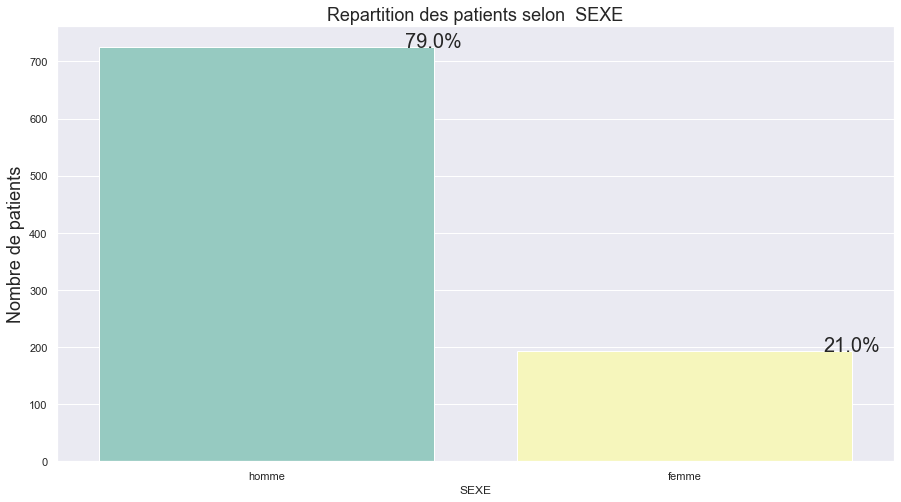

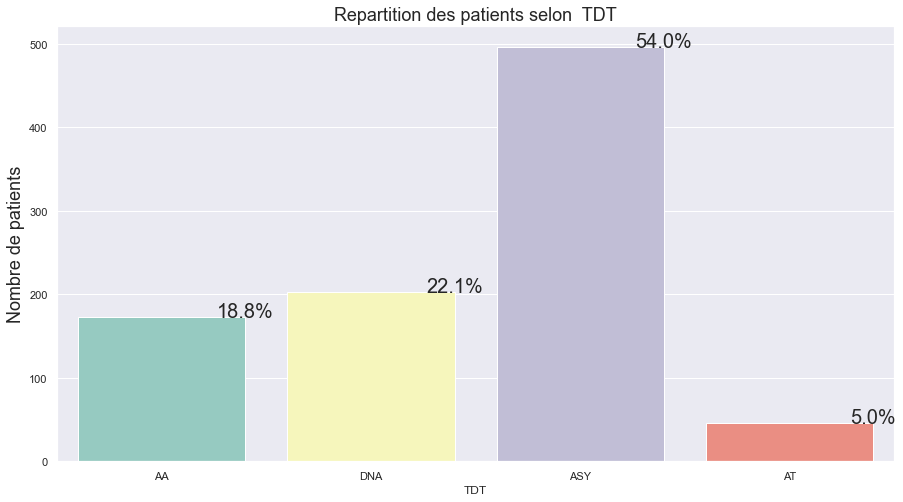

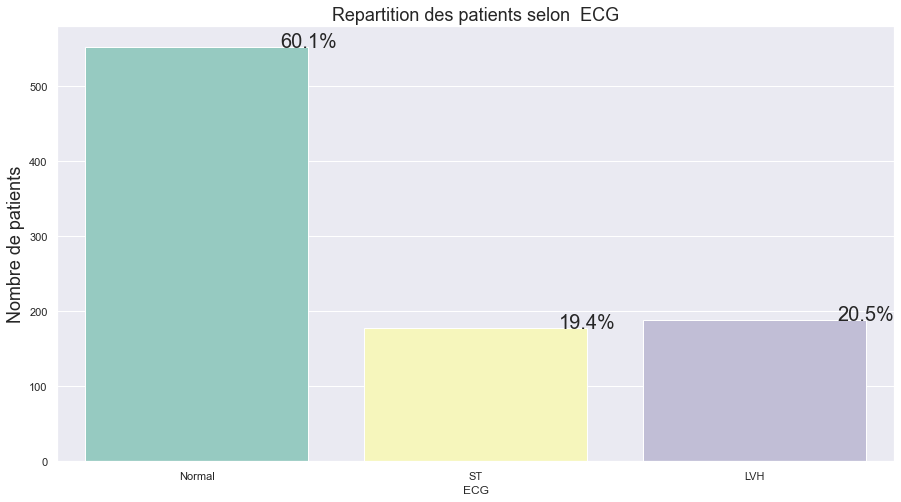

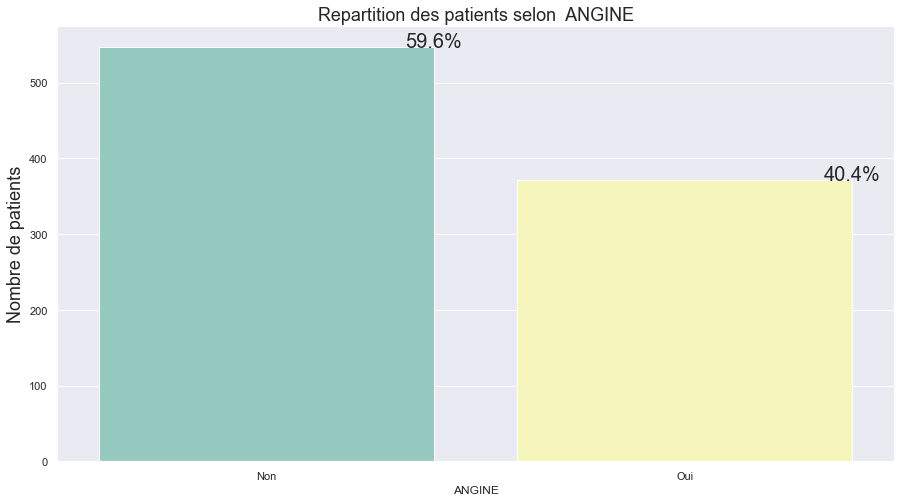

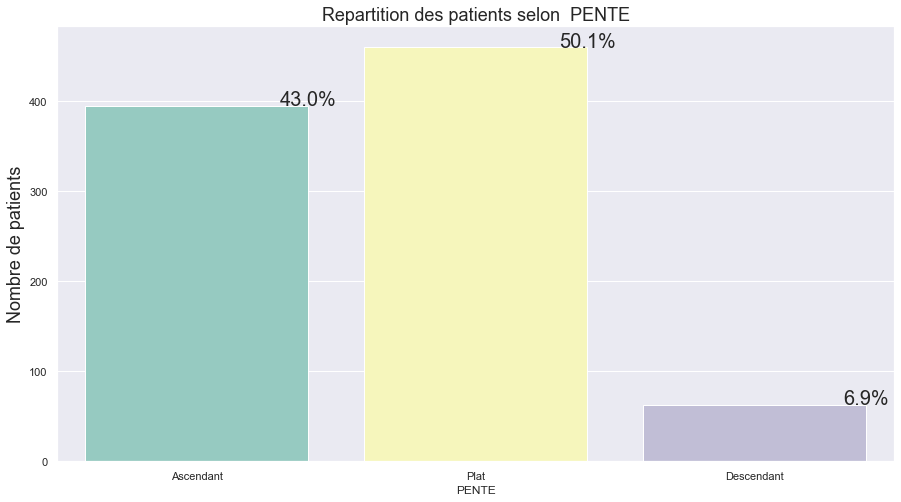

In [128]:
for col in variables_quali:
    
    fig, ax = plt.subplots(figsize=(15, 8), nrows=1, ncols=1)
    
    total = float(len(df))
    ax=sns.countplot(x=col, data=df, palette="Set3")
    ax.set_title('Repartition des patients selon  {}'.format(col), fontsize=18)
    ax.set_ylabel("Nombre de patients", fontsize=18);

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', fontsize=20)
        
    plt.show()

    print(120*'=')

### Interprètation

- La majorité des patients soit 79% issue du jeu de données sont de sexe masculin. Et les 21% restant sont de sexe féminin. Notre population est majoritairement masculine. 

- Plus de la moitié des patients présentent un TDT "asymptomatique" c'est à dire ont une douleur thoracique mais ne présentent pas de symptome. Parmi les 46% restants, 22.1% ont des douleurs non angineuses, 18% ont des douleurs angineuses atypiques et une faible portion de la population soit 5% présentes des douleurs angineuses typiques.

- La majorité des patients, soit environ 60% des individus ont un résultat ECG normal, ECG ST et ECG LVH partagent respectivement les meme pourcentages soit environ 20%.

- 60% des patients présentent une angine et 40% non.

- On observe une pente ST de l'ECG "plat" chez la moitié des patients, dans l'autre moitié, 43% ont une pente ST "Ascendant" et environ 7% une pente "Descendant".

### Visualisation variables catégorielles

In [129]:
variable_cat =["GAJ", "CŒUR"]

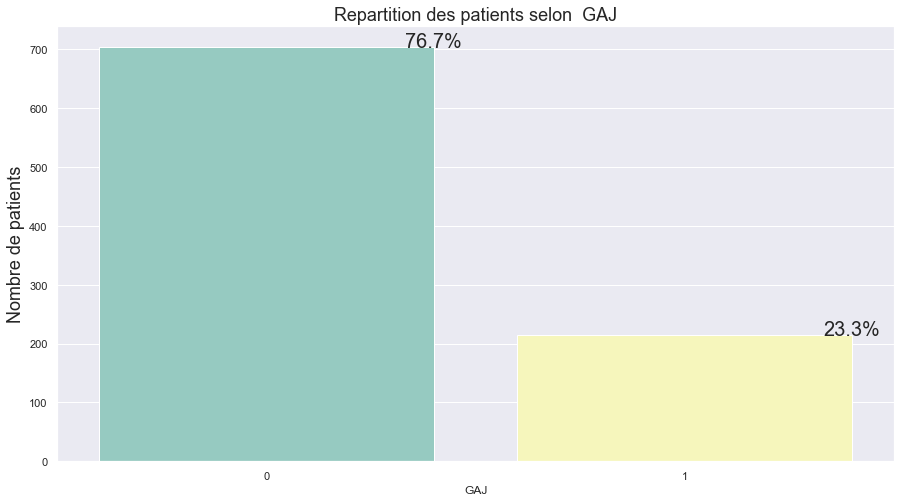

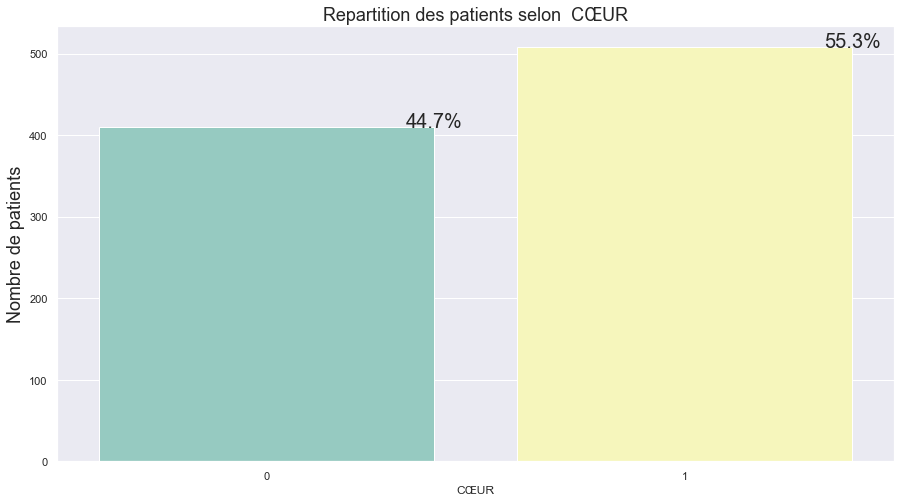

In [130]:
sns.set(style='darkgrid')

for col in variable_cat:
    
    fig, ax = plt.subplots(figsize=(15, 8), nrows=1, ncols=1)
    
    total = float(len(df))
    ax=sns.countplot(x=col, data=df, palette="Set3")
    ax.set_title('Repartition des patients selon  {}'.format(col), fontsize=18)
    ax.set_ylabel("Nombre de patients", fontsize=18);

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', fontsize=20)
        
    plt.show()

    print(120*'=')

### Interprètation

- Une grande majorité des patients soit environ 77% ont une glycémie à jeun <= 120mg/dl et  les 23% restant ont une glycémie à jeune supérieure à ce seuil. Sachant que la Haute autorité de santé parle de diabète lorsque la glycémie à jeun est supérieure à 1.26 g/L, nous pouvons affirmer que les patients dont la glycémie à jeun est supérieure à 120mg/dl (1.2 g/L) approche du diabète ou encore sont diabétique et cet aspect peut influencer sur la présence de maladie cardiaque chez ces patients.

- Au niveau de la variable cible Coeur qui indique la présence ou l'absence de maladies cardiaques, On constate que plus de patients présentent la maladie (54%) et 44.7% ne présentent pas la maladie. On observe au niveau de la variable cible que les classes sont déséquilibrées. Mais le désiquilibre n'est pas important environ 9.3%.

### Visualisations variables quantitatives

In [131]:
var_quant_cont = df.select_dtypes(include=np.number).drop(columns=variable_cat).columns
var_quant_cont

Index(['AGE', 'PAR', 'CHOLESTEROL', 'FCMAX', 'DEPRESSION'], dtype='object')

In [132]:
## DESCRIPTION VARIABLES QUANTITATIVES A L'EXCEPTION DE LA VARIABLE CIBLE
df.select_dtypes(include=np.number).drop(columns='CŒUR').describe()

,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000


Repartition des patients selon  AGE


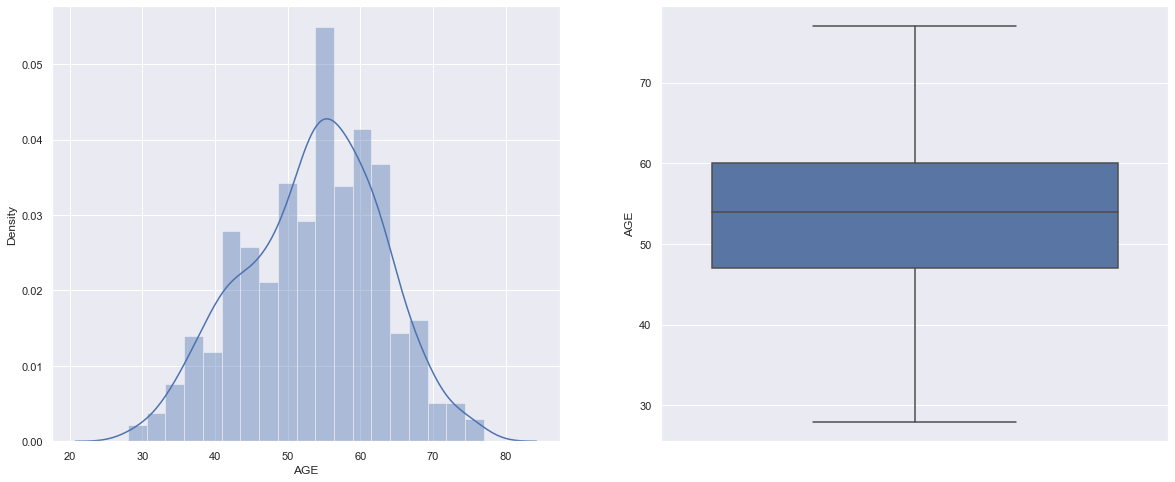

Repartition des patients selon  PAR


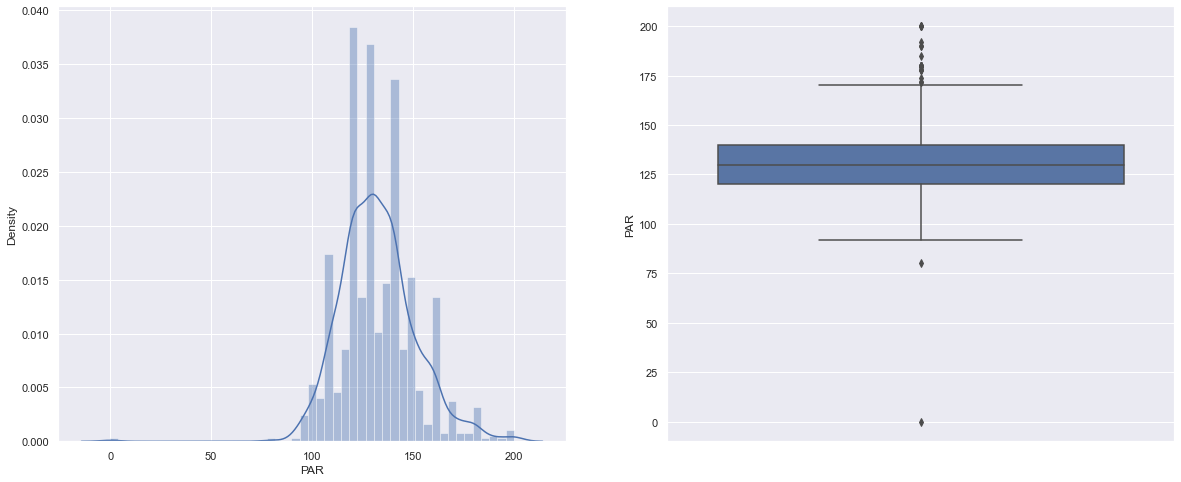

Repartition des patients selon  CHOLESTEROL


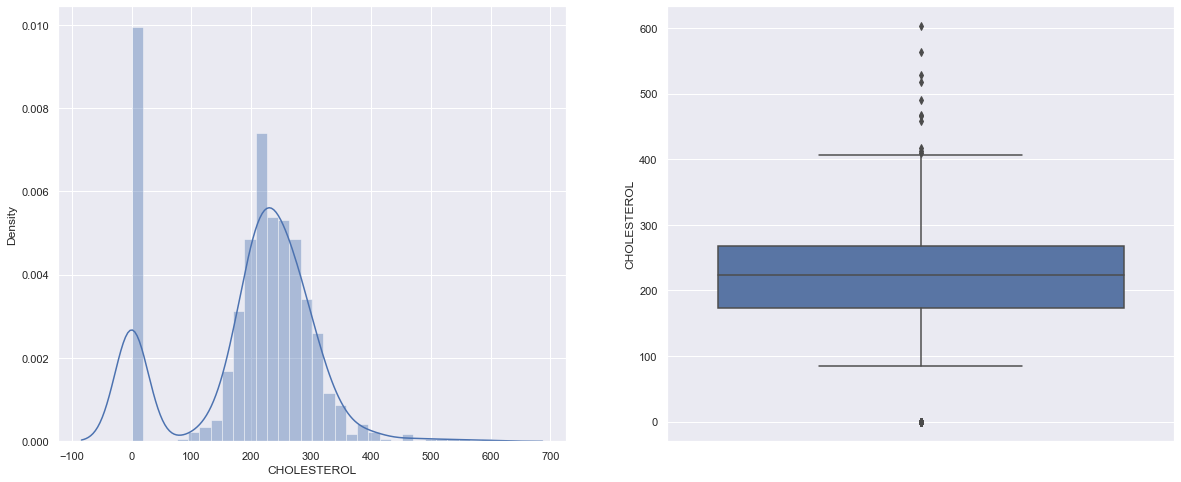

Repartition des patients selon  FCMAX


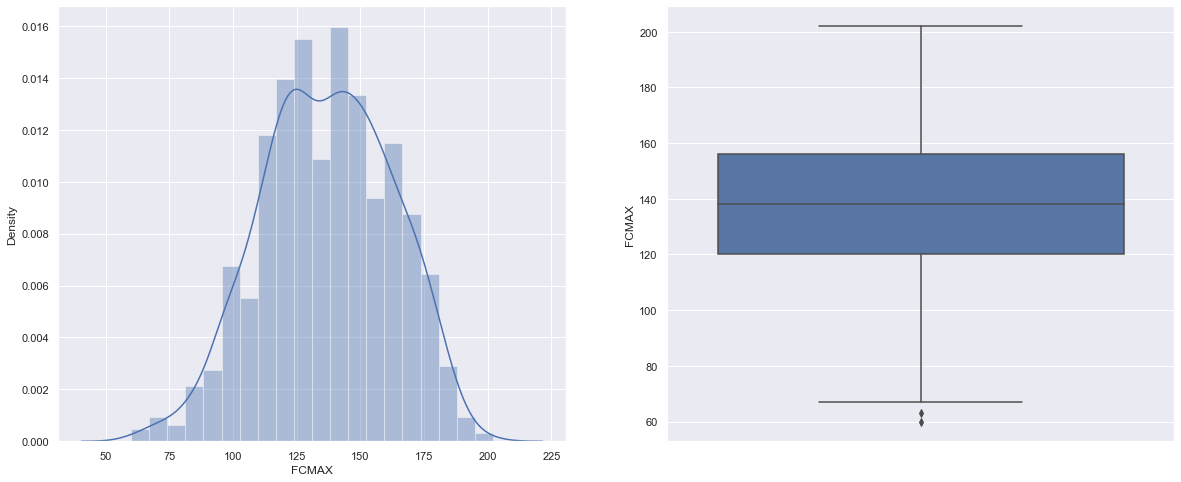

Repartition des patients selon  DEPRESSION


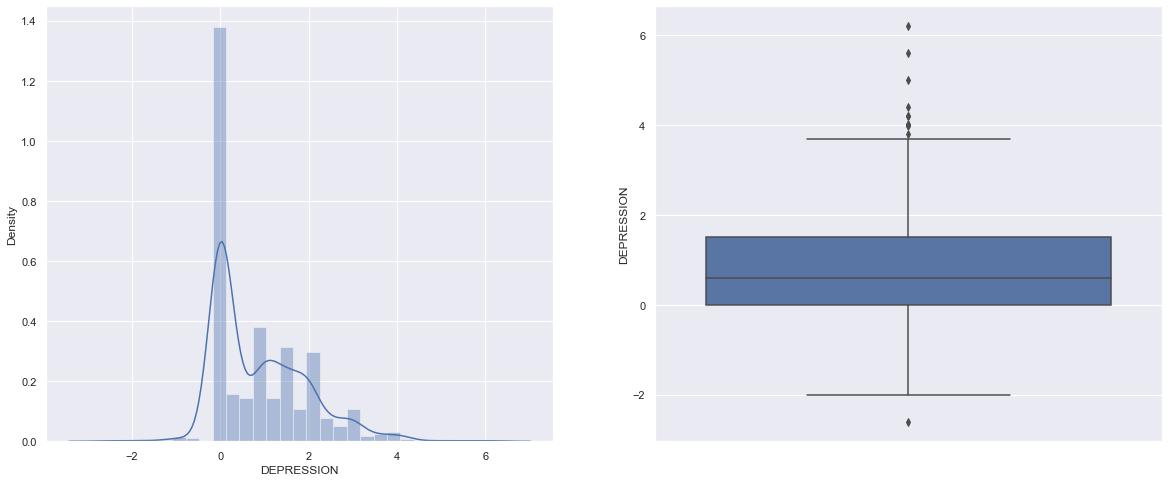

In [133]:
for col in var_quant_cont:
    sns.set(style='darkgrid')
    fig, ax = plt.subplots(figsize=(20, 8), nrows=1, ncols=2)
    
    print('Repartition des patients selon  {}'.format(col))
    
    #print(f'{col :-<50}')
    sns.distplot(df[col], ax=ax[0])
    
    #df[col].plot.hist(ax=ax[0])
    sns.boxplot(y=df[col], ax=ax[1])
    plt.show()
    
    print(120*'=')

 - AGE :
 
 La dispersion des données au niveau de l'AGE s'étend de 25 à environ 78 ans. On observe un pic chez les individus dont l'age est comprise entre 54 et 56 ans. Cela correspond à la classe modale,  c'est à dire que les patients de cette tranche d'ages sont les plus fréquents dans notre dataset. L'on peut dire que, les données de la variable AGE s'ajuste à la loi de distribution normale (mode=mediane et la moyenne est à peu près égale à la médiane environ 54) meme si l'on peut constater un léger ajustement vers la gauche au niveau de cette variable que j'ai jugé pas significative.
 
 ---------------------------------------------------------------------------------------------------------------------------------
 
 - PAR (Pression Artérielle au Repos):
 
  La dispersion des données s'étend de 0 à 200 au niveau de la presion artérielle. La distribution est légèrement étalée vers la droite (Med= 130 et Mean=132.39). L'écart entre le mediane et la moyenne n'étend pas significative, l'on peut dire que la distribution est symétrique. Mais la distribution semble faussée avec un un grand nombre de valeurs aberrantes, les patients ont généralement des pressions artérielles comprisent entre 90 et 170.
  
------------------------------------------------------------------------------------------------------------------------------  
  
  - CHOLESTEROL :
  
  La distribution est faussée, la moyenne (198) est largement supérieure à la médiane (223). Il y a des individus qui admettent un niveau de cholestérol égale à zéro, cette valeur s'écarte des données de la variable CHOLESTEROL.
  
  - FCMAX (Fréquence cardiaque Maximale) : 
  
  La fréquence maximale cardiaque varie entre 60 et 202. Les données de cette variable s'ajuste à peu près à la loi de distribution normale. On observe quelques valeurs aberrantes en dessous de la borne minimale de la boite à moustache.
 
------------------------------------------------------------------------------------------------------------------------------

  - DEPRESSION : 
  Cette variable est étalée vers la droite. Quelques patients qui sont beaucoup dépressif affecte grandement la moyenne.

  
 
 

- Conclusion :

La variable AGE, FCMAX ont une distribution à peu près normale. Pour les autres variables dont la PAR, Le niveau de CHOLESTEROL et la dépression un traitement sur les valeurs abérantes est nécessaire.

### Analyse bivariée

### Quali VS Quali

In [134]:
## Regroupement variables qualitatives et catégorielles (COEUR et GAJ)
var_quali_cat = df.drop(columns=var_quant_cont).columns
var_quali_cat

Index(['SEXE', 'TDT', 'GAJ', 'ECG', 'ANGINE', 'PENTE', 'CŒUR'], dtype='object')

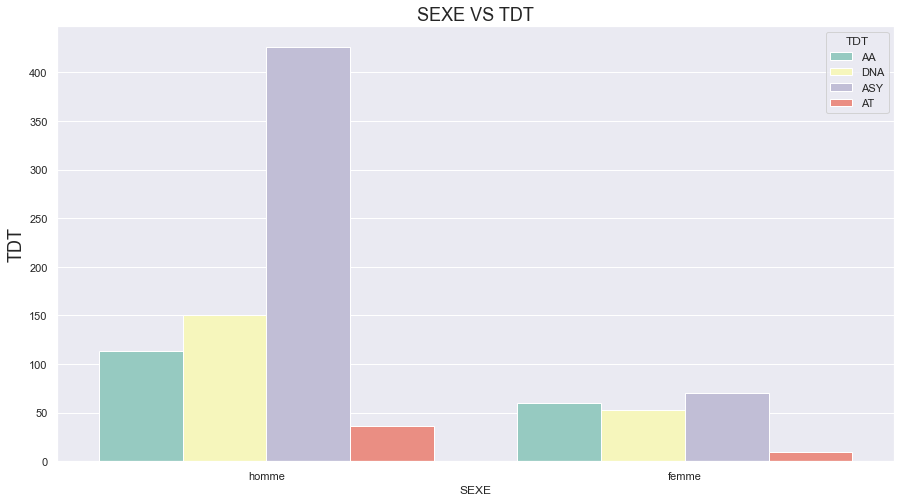

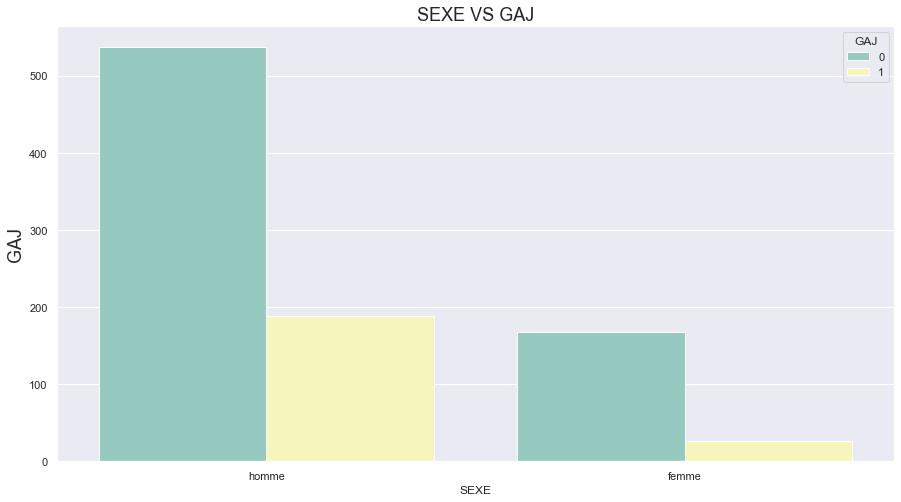

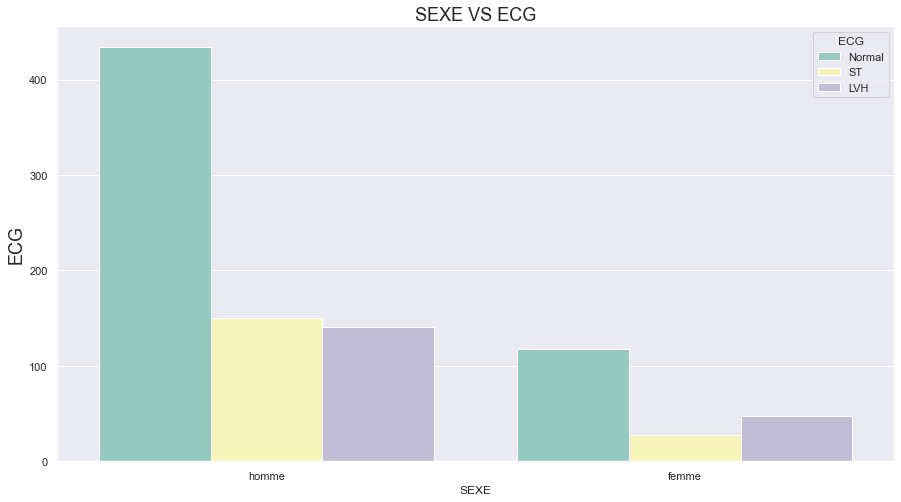

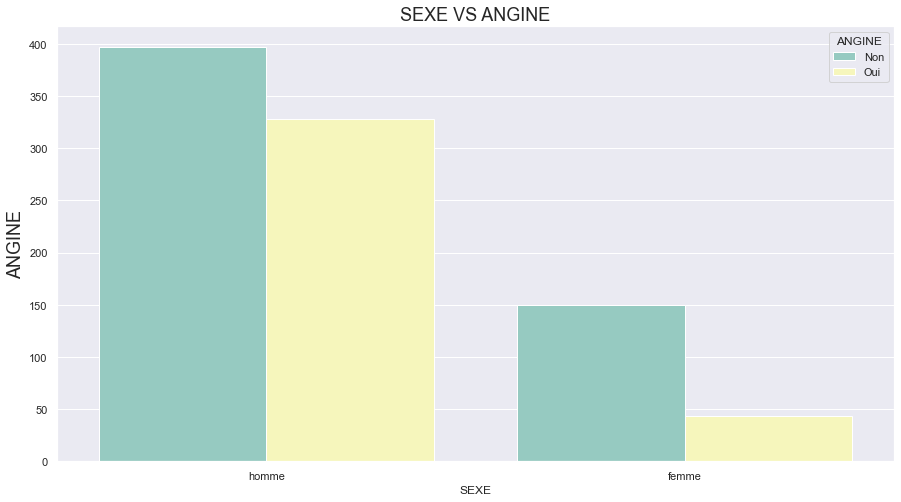

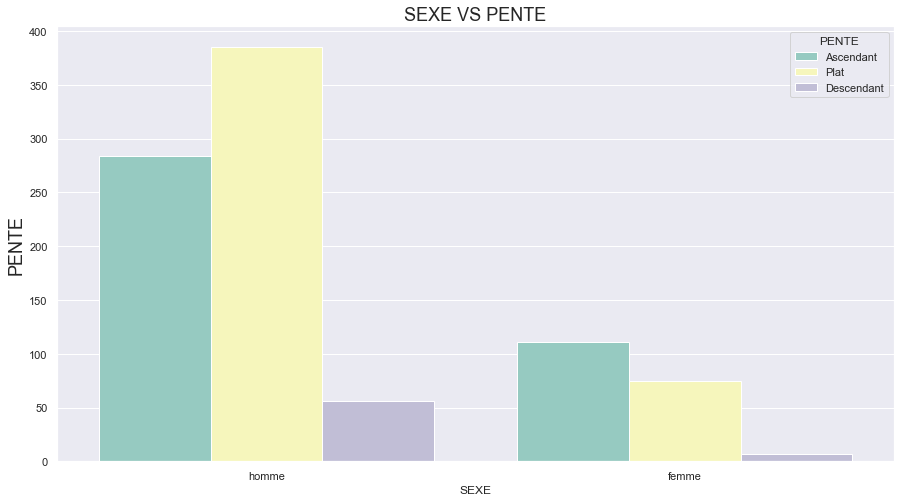

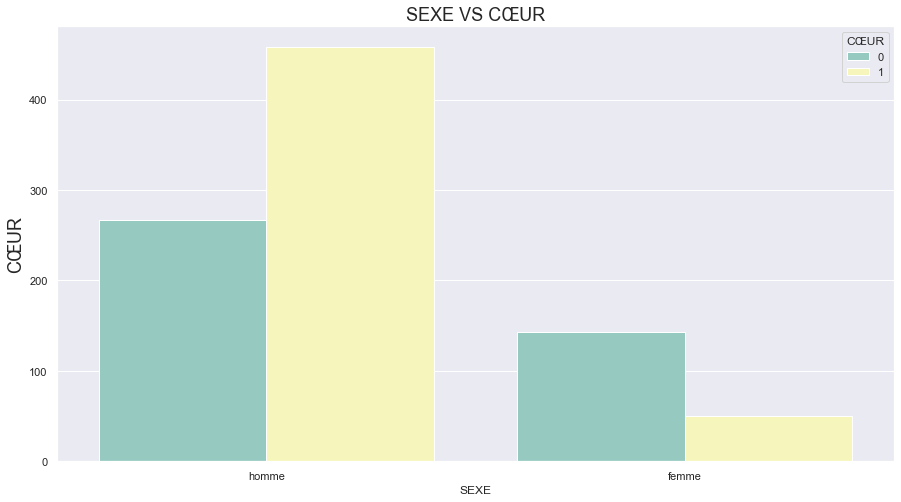

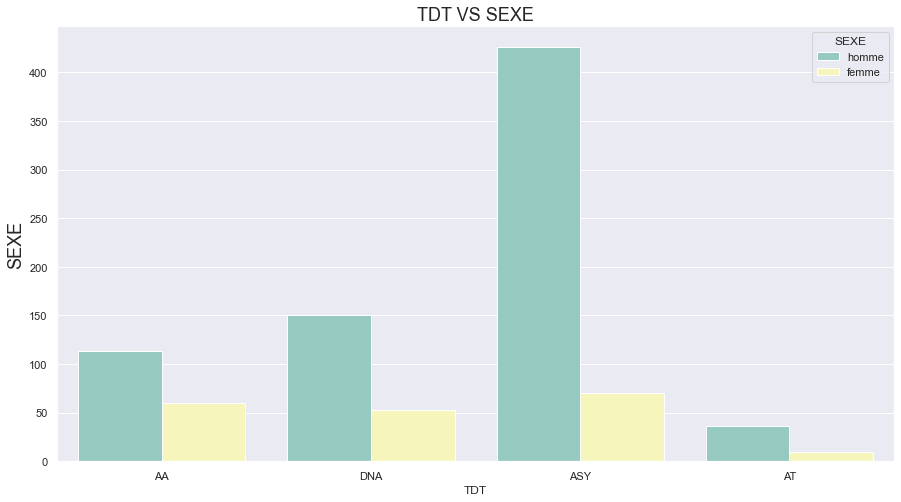

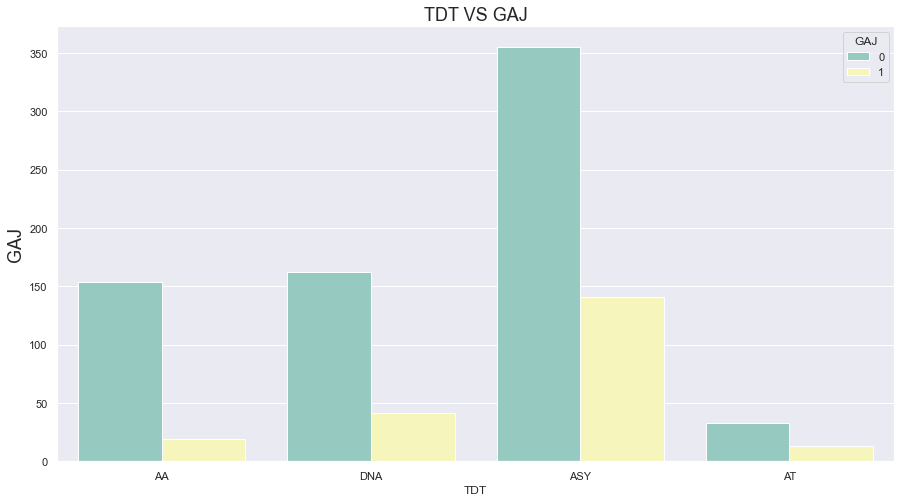

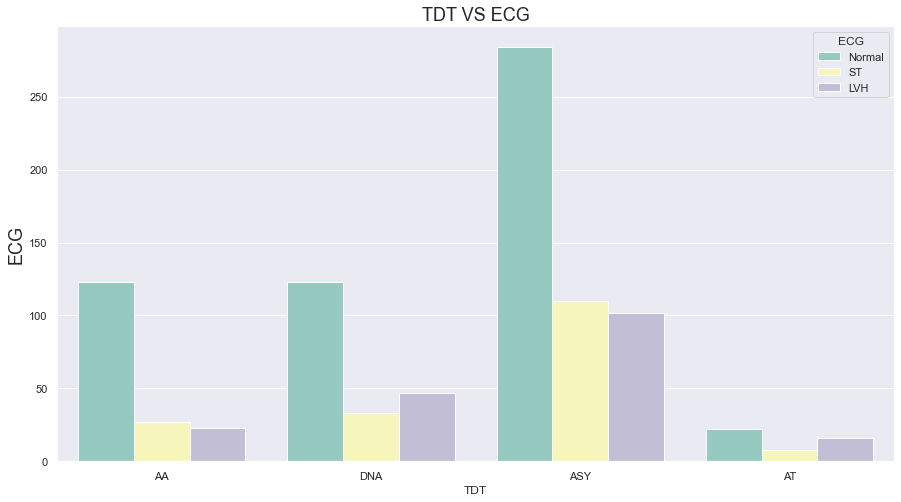

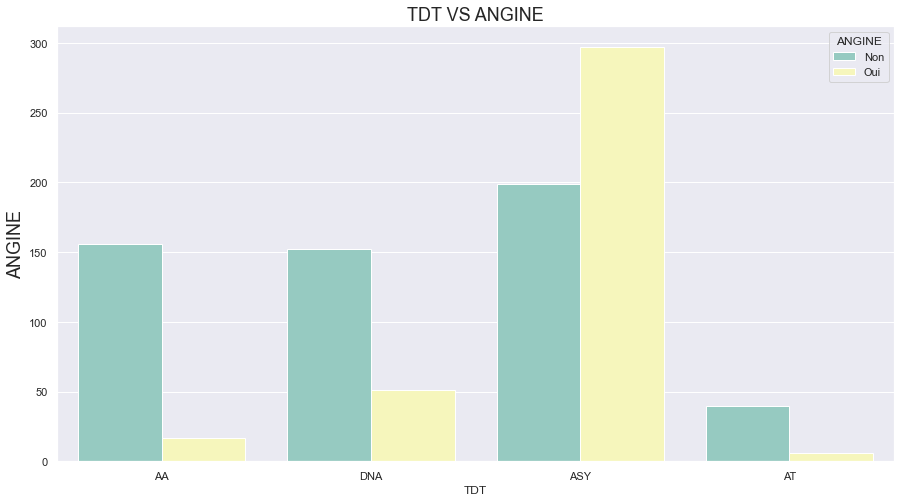

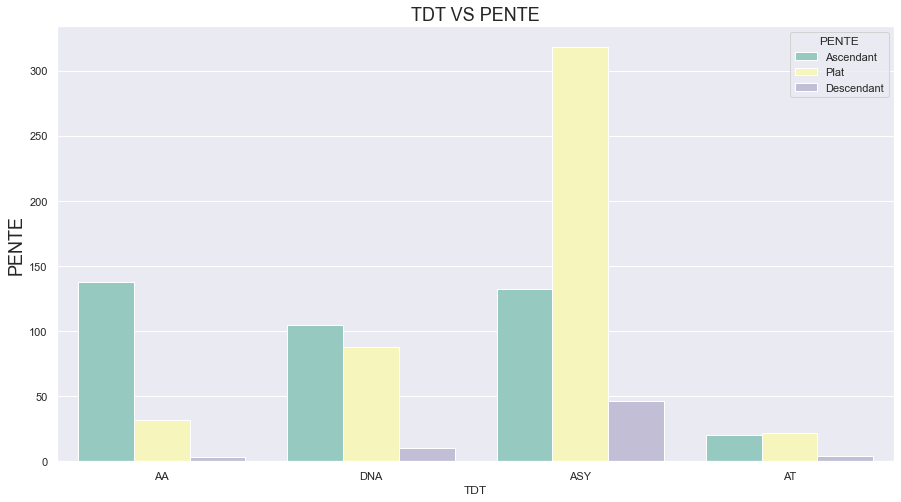

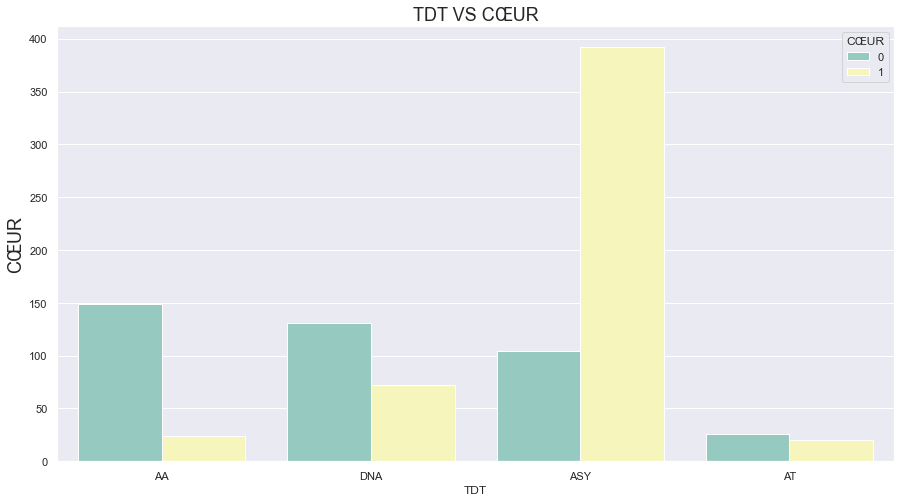

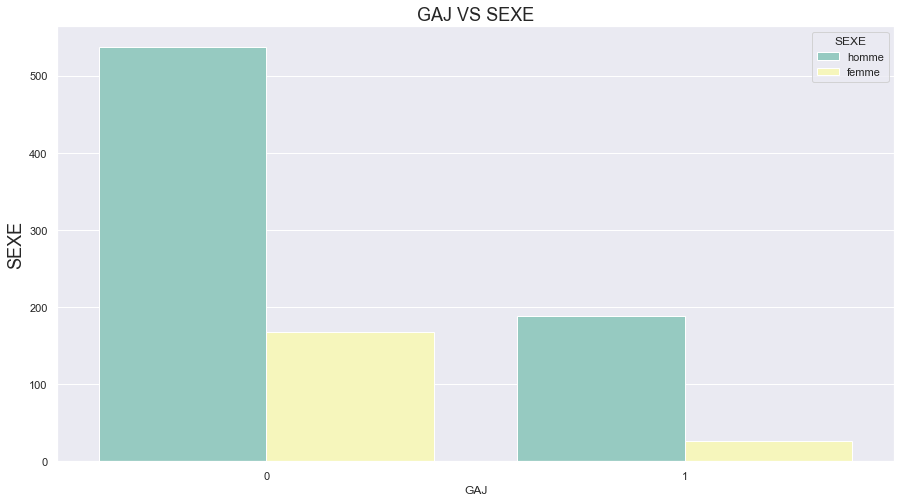

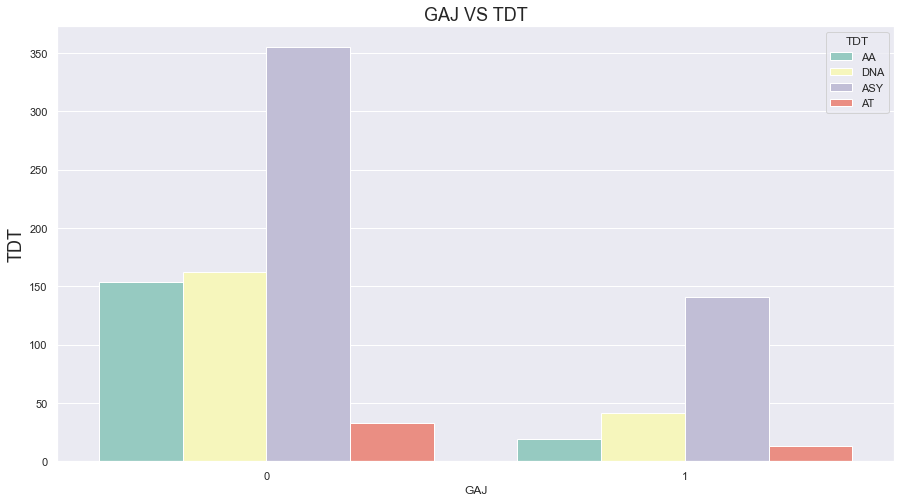

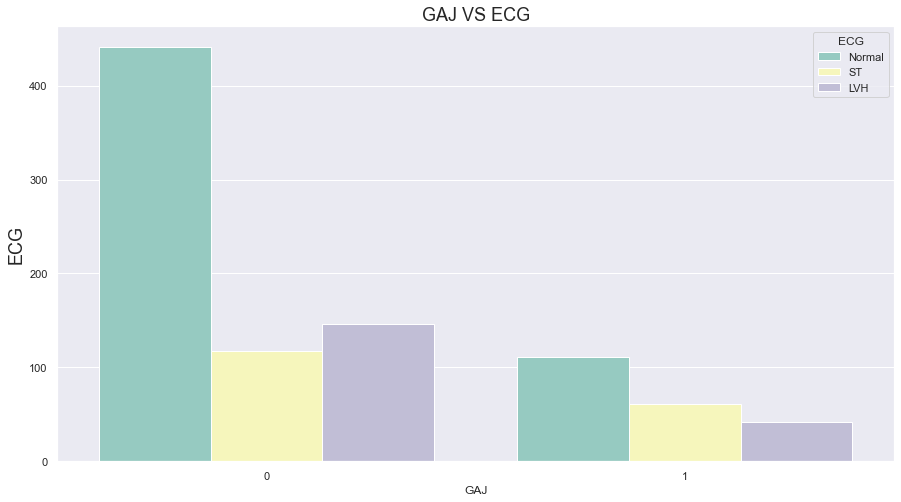

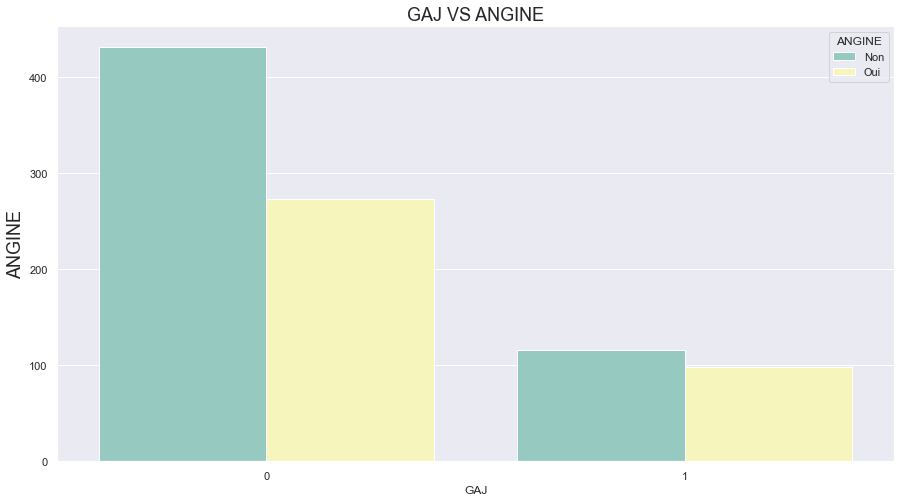

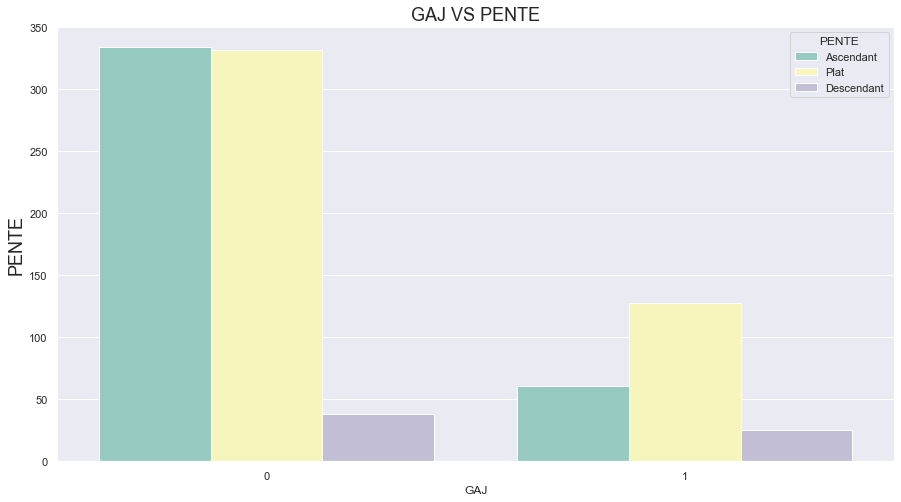

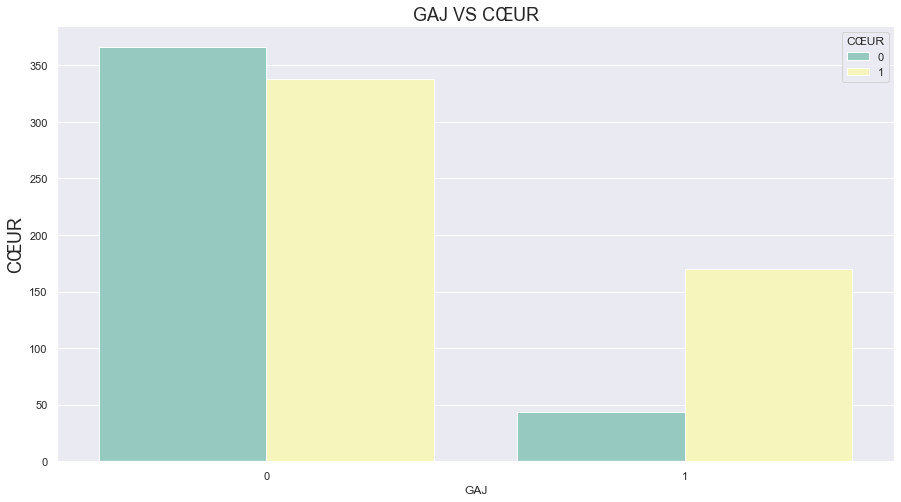

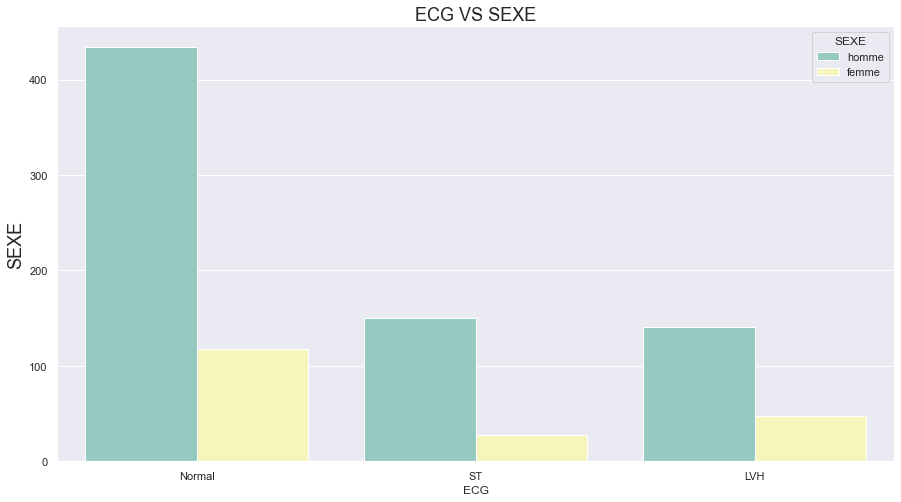

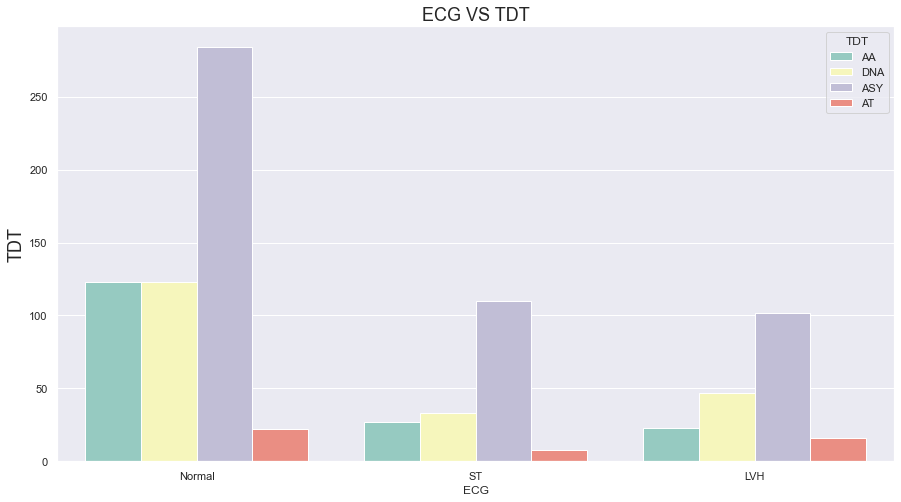

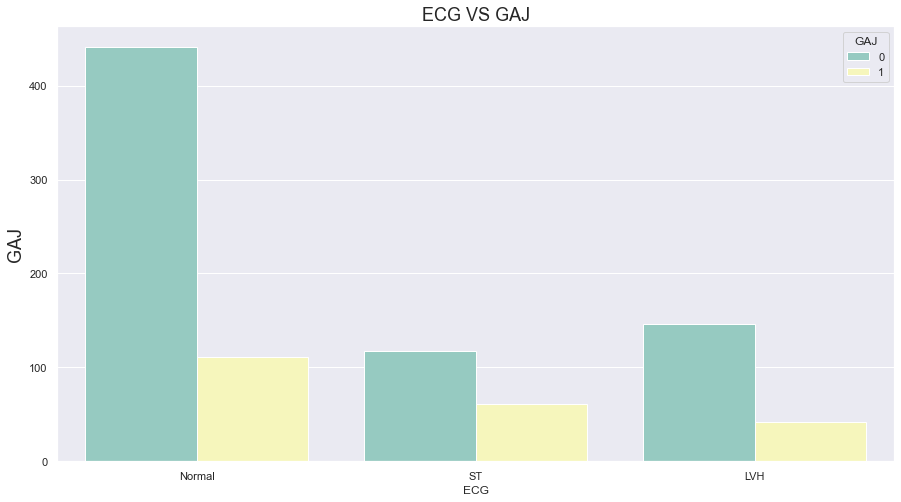

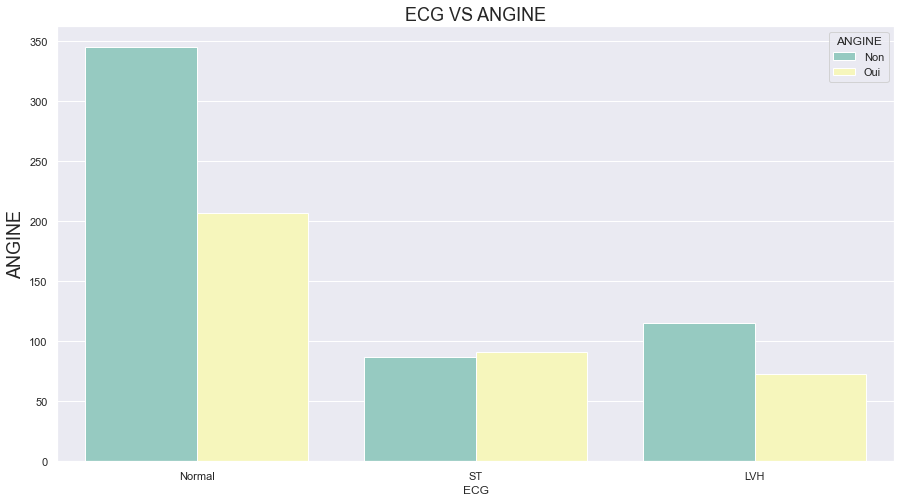

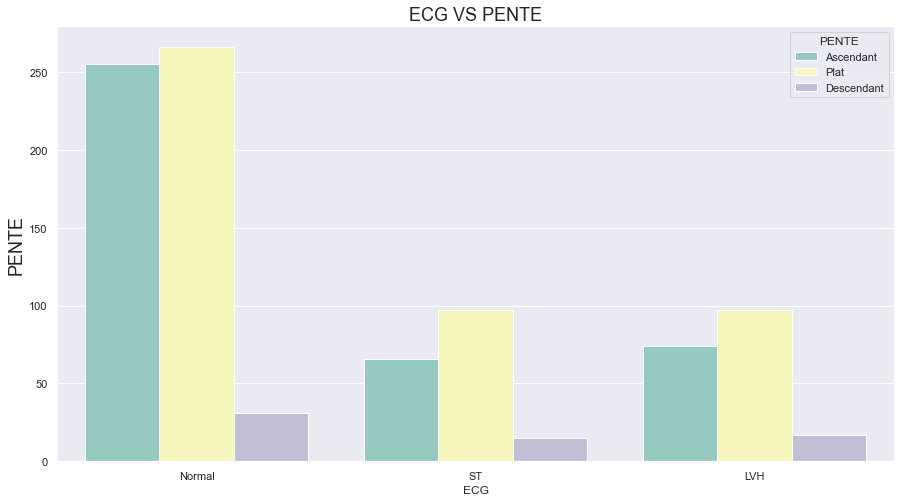

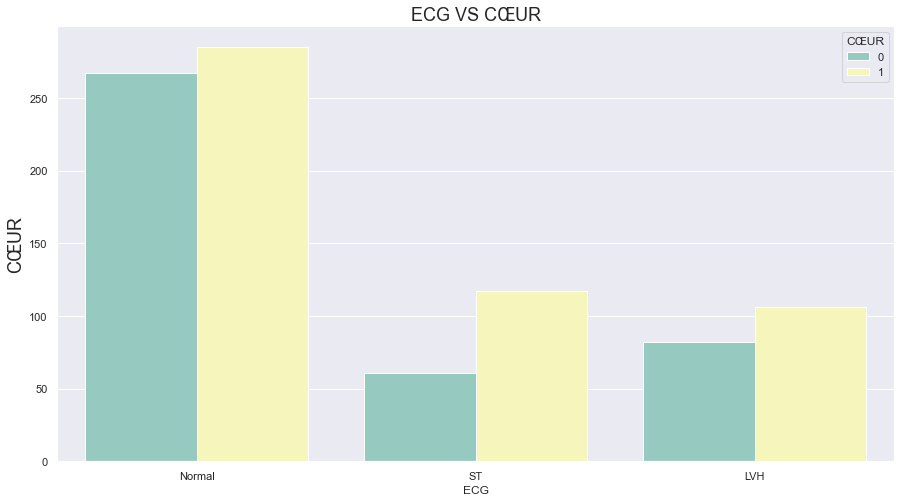

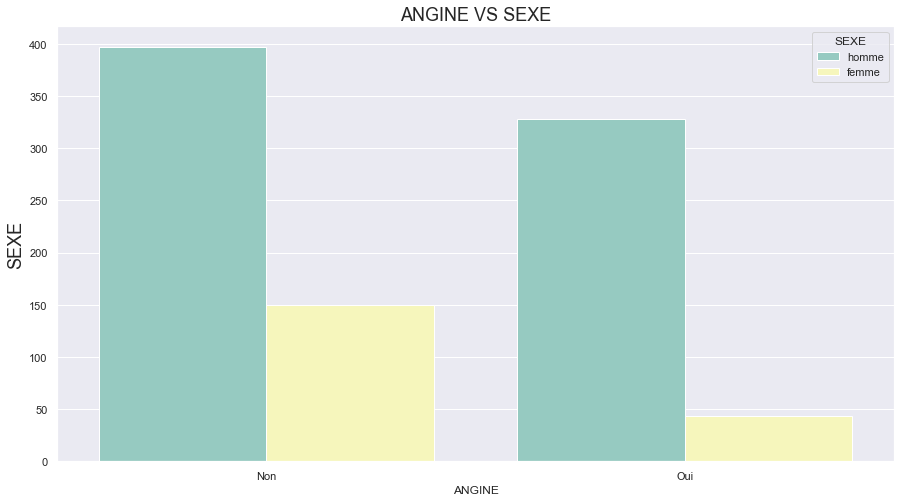

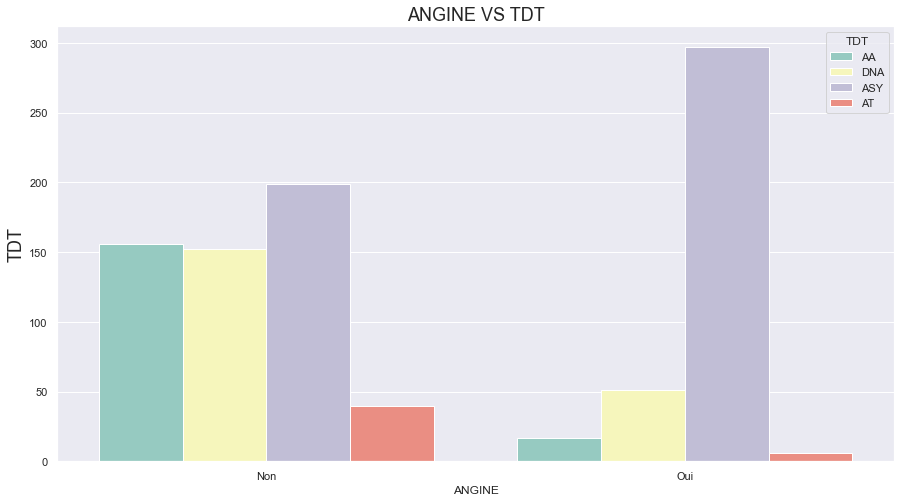

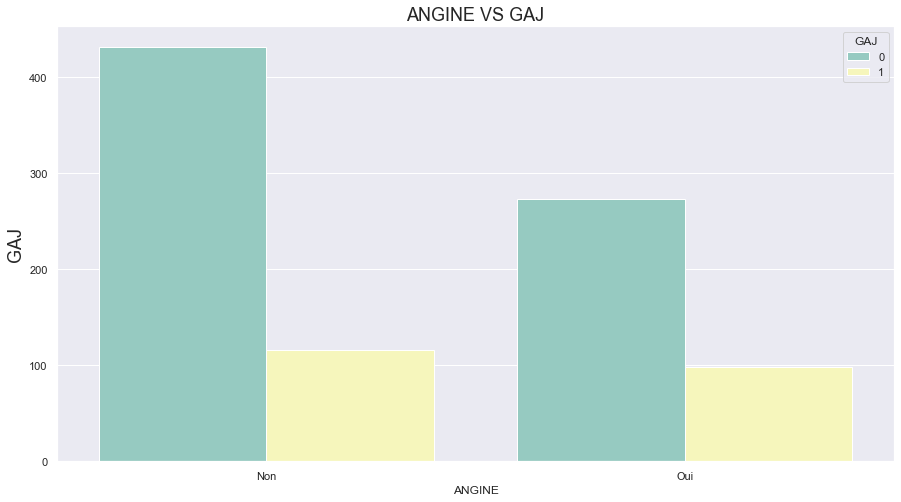

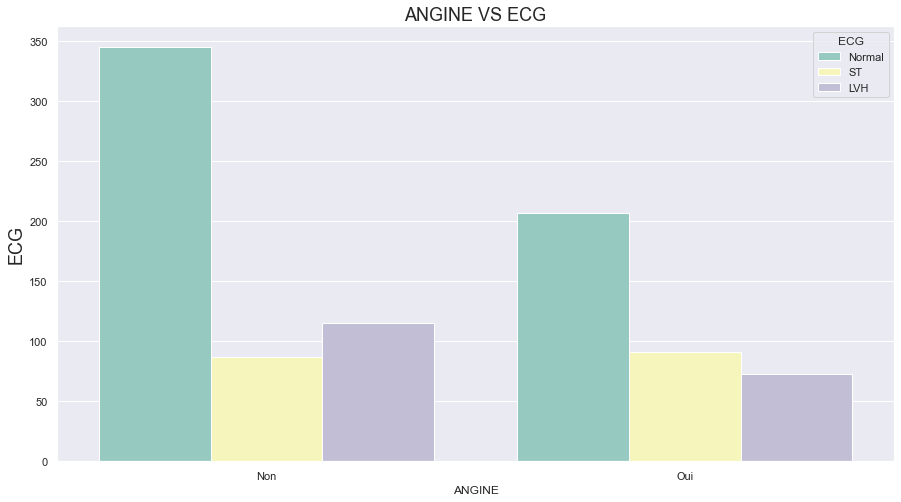

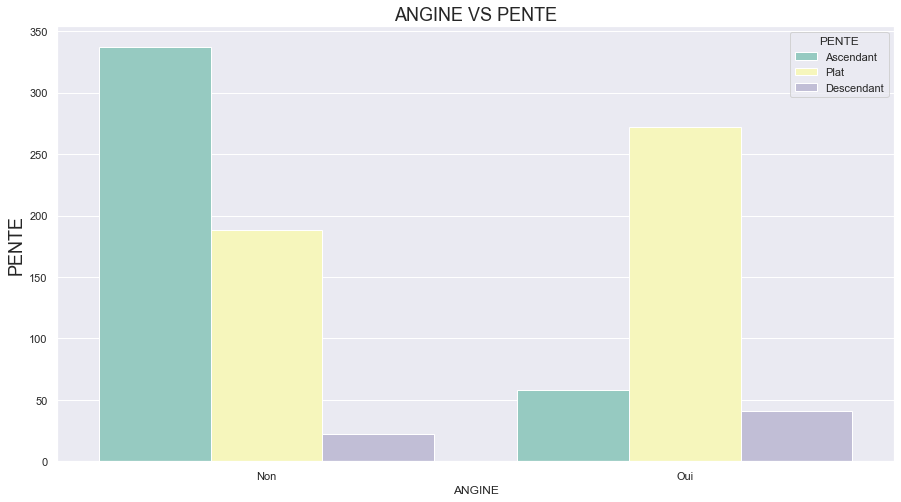

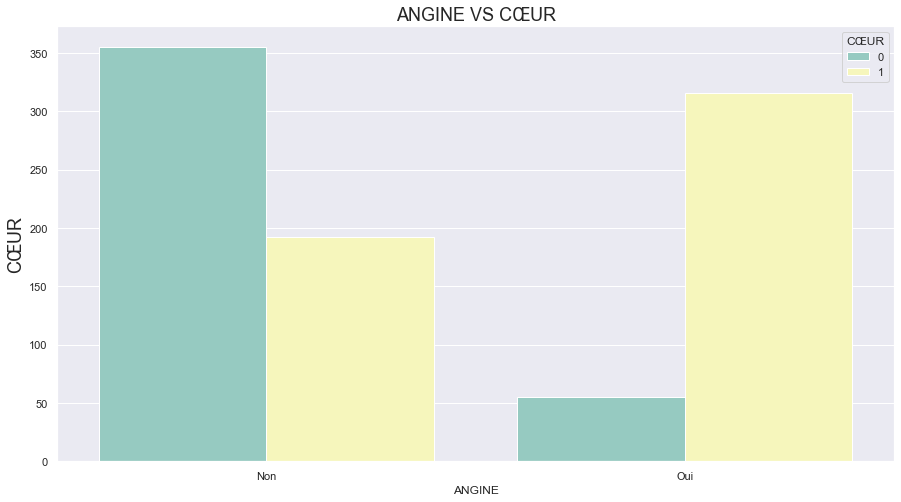

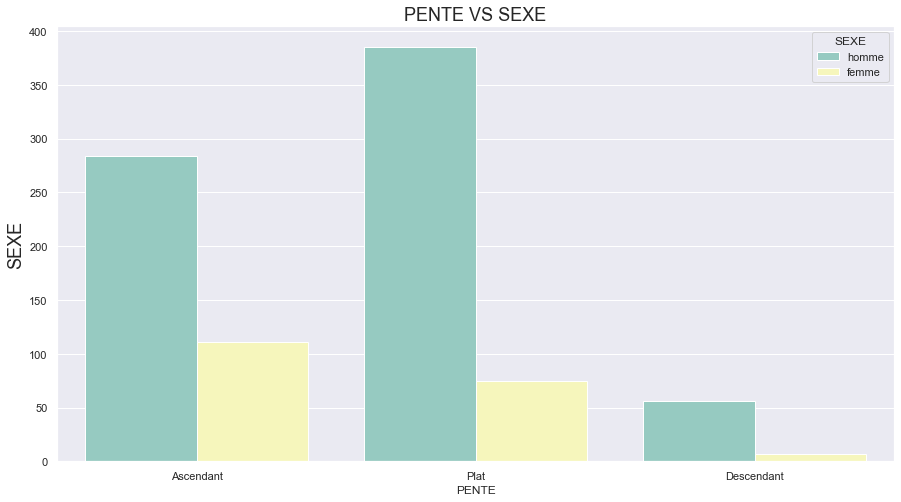

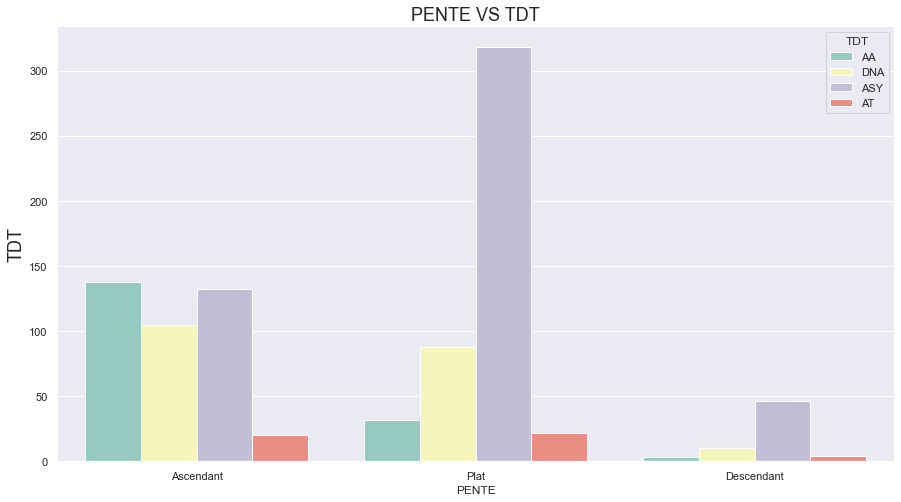

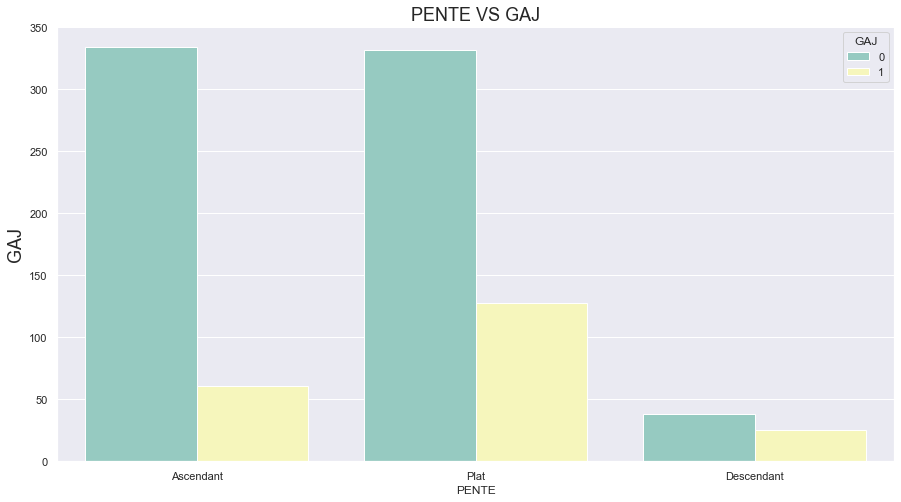

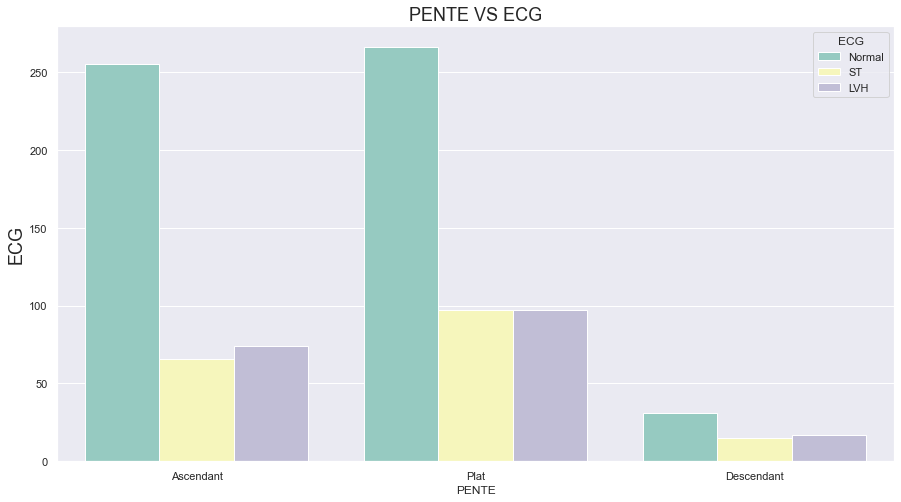

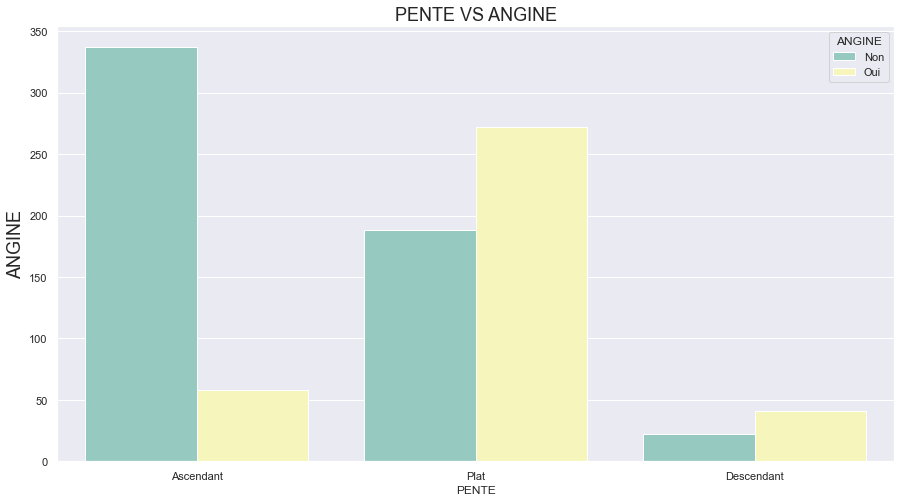

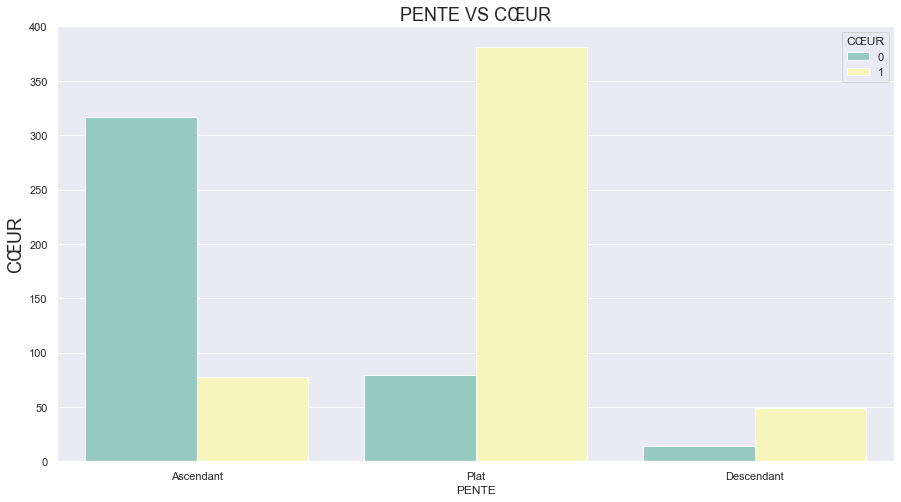

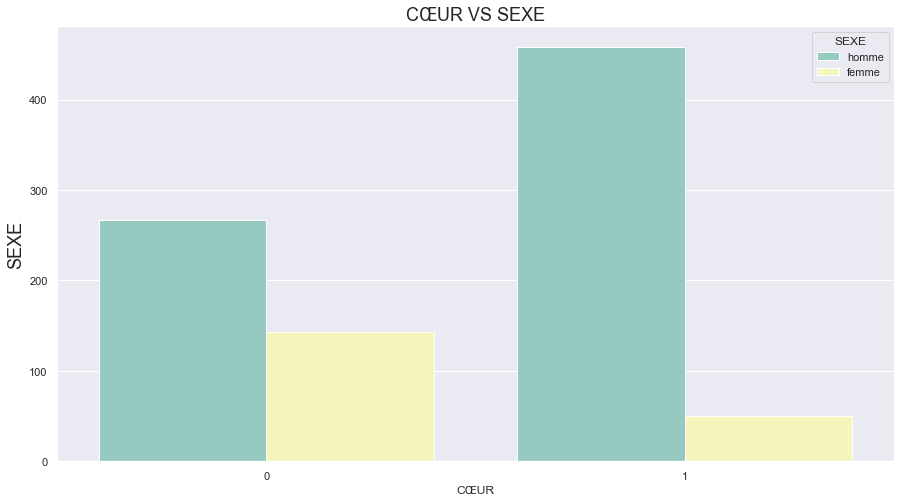

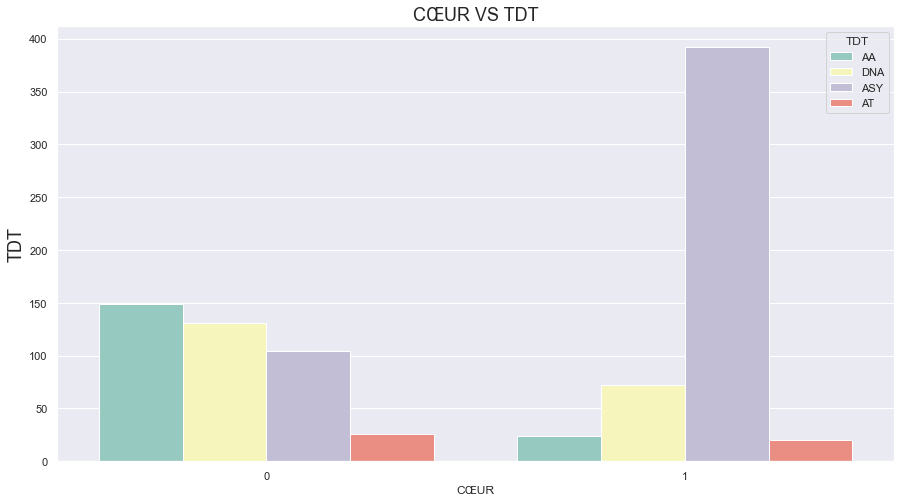

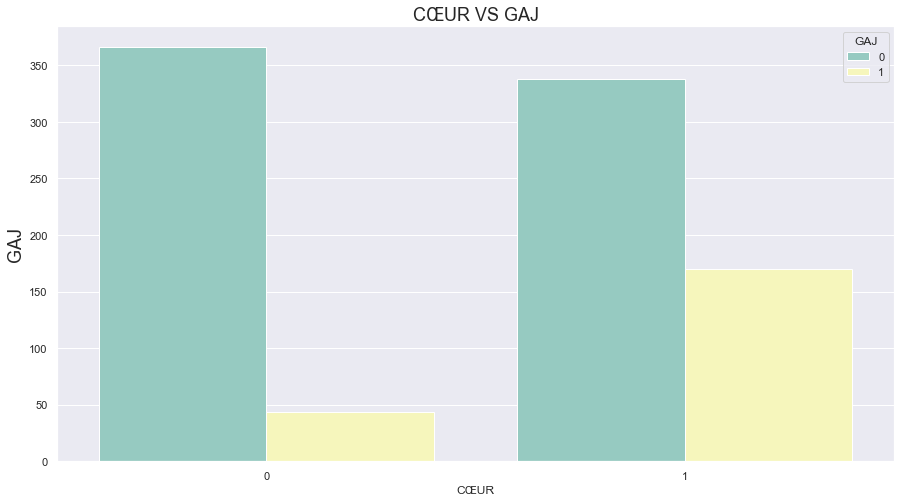

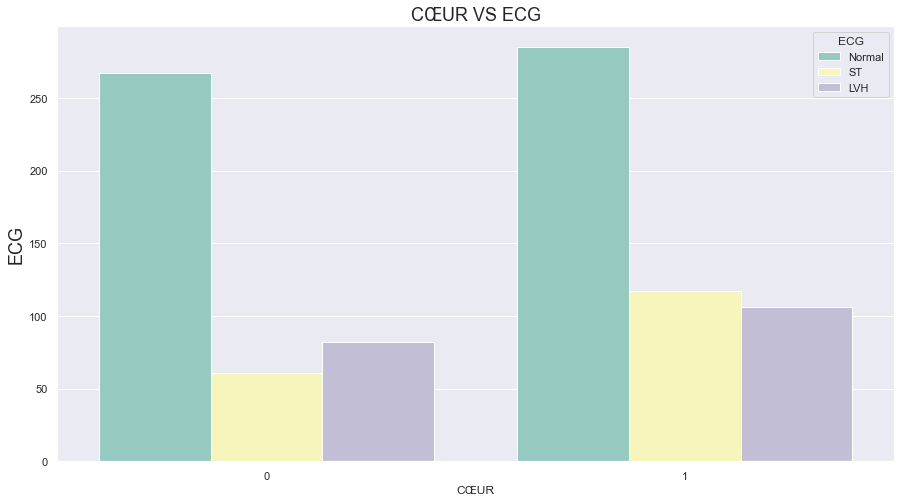

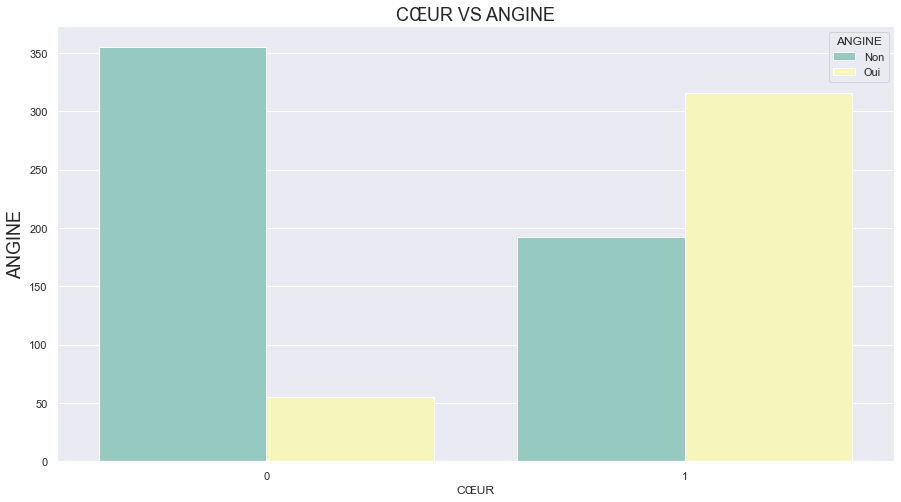

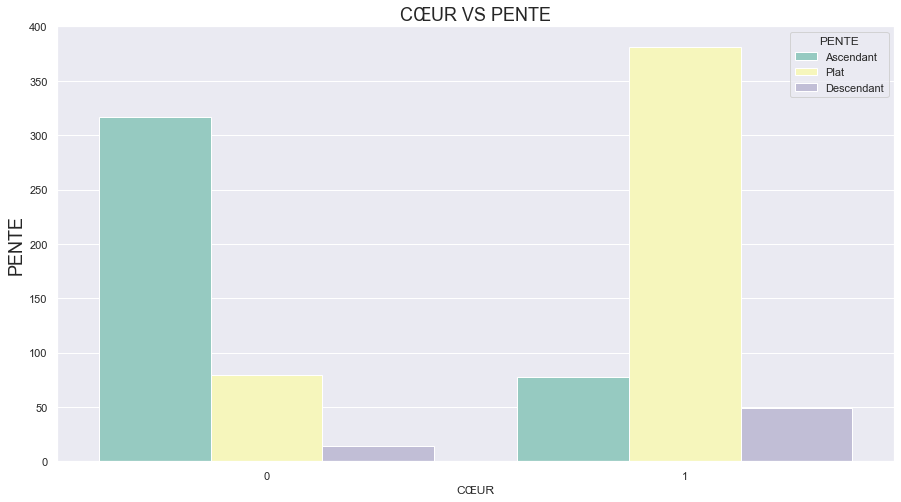

In [135]:
for var1 in var_quali_cat:
    
    for var2 in var_quali_cat:
        
        if var1 != var2:
        
            fig, ax = plt.subplots(figsize=(15, 8), nrows=1, ncols=1)



            ax = sns.countplot(x=var1, hue=var2, data=df, palette="Set3")
            ax.set_title('{} VS {}'.format(var1, var2), fontsize=18)
            ax.set_ylabel("{}".format(var2), fontsize=18);
        


### Analyse et Interprètation

In [136]:
# from scipy.stats import chi2_contingency as chi2_contingency
# for i in  df.select_dtypes(object):
#     for j in df.select_dtypes(object):
#         if i != j:
#             matrice = pd.crosstab(df[i], df[j])
#             khi2, pval , ddl , contingent_theorique = chi2_contingency(matrice)
#             print(matrice)
#             print(pval)
#             print('')
#             print('')

# from scipy.stats import personr


### Quanti VS Quanti

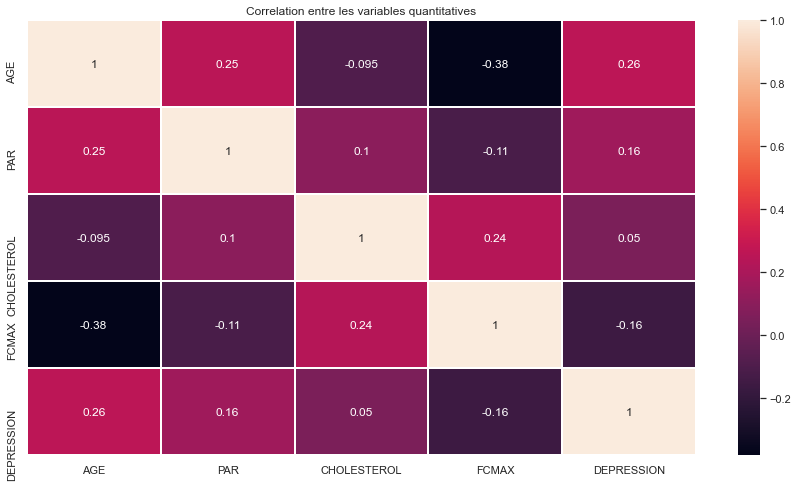

In [137]:
plt.figure(figsize=(15,8))
heat_map = sns.heatmap(df[var_quant_cont].corr(), linewidth = 1 , annot = True)
plt.title( "Correlation entre les variables quantitatives" )
plt.show()

La carte thermique nous montre qu'il n'existe pas de corrélations linéaires significatives entre les variables quantitatives |corr|<0.4 . Calculons la P_value du test de Pearsonr pour étudier si les corrélations calculées sont significatives. 

- H0 : La corrélation calculé n'est pas statistiquement significative et l'on ne doit pas se fier au coeff de corrélation.
- H1 : La corrélation est statistiquement significative et on peut utiliser le coefficient de Pearson calculé.

In [138]:
from scipy.stats import pearsonr

for var1 in var_quant_cont:
    for var2 in var_quant_cont:
        if var1 != var2:
            
            r = pearsonr(df[var1], df[var2])[0]
            p_value = pearsonr(df[var1], df[var2])[1]
            print(f"{var1} et {var2} :")
            print(f"r : {r}")
            print(f"p-value : {p_value}")
            print(120*'=')

AGE et PAR :
r : 0.25439935615154485
p-value : 5.0147697437822694e-15
AGE et CHOLESTEROL :
r : -0.09528177118121894
p-value : 0.0038580710435994576
AGE et FCMAX :
r : -0.3820446750319705
p-value : 2.8411217807772657e-33
AGE et DEPRESSION :
r : 0.2586115360187564
p-value : 1.7109931707675088e-15
PAR et AGE :
r : 0.25439935615154485
p-value : 5.0147697437822694e-15
PAR et CHOLESTEROL :
r : 0.10089294207709178
p-value : 0.00220928037303228
PAR et FCMAX :
r : -0.11213499711297986
p-value : 0.0006649560771571509
PAR et DEPRESSION :
r : 0.164803043171389
p-value : 5.144255126696753e-07
CHOLESTEROL et AGE :
r : -0.09528177118121894
p-value : 0.0038580710435994576
CHOLESTEROL et PAR :
r : 0.10089294207709178
p-value : 0.00220928037303228
CHOLESTEROL et FCMAX :
r : 0.235792403002385
p-value : 4.597229278316862e-13
CHOLESTEROL et DEPRESSION :
r : 0.050148109140804045
p-value : 0.12893919909478516
FCMAX et AGE :
r : -0.3820446750319705
p-value : 2.8411217807772657e-33
FCMAX et PAR :
r : -0.112134

- Ici l'on peut voir que la p_value est largement inférieure au seuil généralement pris qui est de 0.05, à l'exception de la p-value résultente de la corrélation entre les variables DEPRESSION et PAR, On accepte donc pour ces corrélations l'hypothèse H0 (les corrélations calculées sont statistiquement significatives). Pour ces variables, la valeur des coefficients de corrélations indiquent donc qu'il n'y a pas de lien entre ces variables.

## PREPROCESSING ET MODELISATION

In [139]:
## Une autre copie de mon dataframe pour mon préprocessing
df2 = data.copy()
df2.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


In [140]:
df2.rename(columns={'DEPRESSION ':'DEPRESSION'}, inplace=True)
df2['DEPRESSION'].head()

0    0.0
1    1.0
2    0.0
3    1.5
4    0.0
Name: DEPRESSION, dtype: float64

### Encodage

In [141]:
## Dataframe des variables qualitatives
df_quali = df2[variables_quali]
df_quali.head()

,SEXE,TDT,ECG,ANGINE,PENTE
0,homme,AA,Normal,Non,Ascendant
1,femme,DNA,Normal,Non,Plat
2,homme,AA,ST,Non,Ascendant
3,femme,ASY,Normal,Oui,Plat
4,homme,DNA,Normal,Non,Ascendant


In [142]:
### Fonction d'encodage OneHot
def encodage_OneHotEncoder(df_quali):
    
    encode = OneHotEncoder(sparse=False, drop='if_binary')
    
    df_quali_enc = pd.DataFrame(encode.fit_transform(df_quali), index=df_quali.index)
    df_quali_enc.columns = encode.get_feature_names(variables_quali)
    
    return df_quali_enc


In [143]:
df_quali_enc = encodage_OneHotEncoder(df_quali)
df_quali_enc

,SEXE_homme,TDT_AA,TDT_ASY,TDT_AT,TDT_DNA,ECG_LVH,ECG_Normal,ECG_ST,ANGINE_Oui,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
914,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
915,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
916,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### 1ère modelisation

### Concaténation

In [144]:
new_df = pd.concat([df2.select_dtypes(include=np.number), df_quali_enc], axis=1)
new_df.head()

,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION,CŒUR,SEXE_homme,TDT_AA,TDT_ASY,TDT_AT,TDT_DNA,ECG_LVH,ECG_Normal,ECG_ST,ANGINE_Oui,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat
0,40,140,289,0,172,0.0,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,49,160,180,0,156,1.0,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,37,130,283,0,98,0.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,48,138,214,0,108,1.5,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,54,150,195,0,122,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Subdivision du jeu de données

In [145]:
# Fonction pour diviser mon dataset en variables indépendantes et variables dépendantes
def decoupe_df(df):

    X=df.drop('CŒUR', axis=1)
    y=df['CŒUR']
    
    return X, y

In [146]:
X, y = decoupe_df(new_df)

In [147]:
print(new_df.shape)
print(X.shape)
print(y.shape)

(918, 19)
(918, 18)
(918,)


In [148]:
### Subdivision du jeu de données de tests et données d'entrainement
X_train, X_test ,y_train ,y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [149]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(642, 18)
(276, 18)
(642,)
(276,)


### Chargement des estimateurs

In [150]:
model_logistic = LogisticRegression(solver='liblinear', random_state=0)
model_KNN = KNeighborsClassifier()
model_SVC = SVC()
model_RF = RandomForestClassifier(random_state=0)

In [151]:
def evaluation(model, X_train, y_train, X_test, y_test):
    print(model)
    print(" ")
    model.fit(X_train, y_train)
    print(f"Score à l'entrainement : {model.score(X_train, y_train)}")
    print(f"Score au test : {model.score(X_test, y_test)}")
    y_pred=model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test,y_pred))

In [152]:
for model in (model_logistic, model_KNN, model_SVC, model_RF):
    evaluation(model, X_train, y_train, X_test , y_test)
    print(120*'=')

LogisticRegression(random_state=0, solver='liblinear')
 
Score à l'entrainement : 0.8707165109034268
Score au test : 0.8659420289855072
[[ 98  22]
 [ 15 141]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       120
           1       0.87      0.90      0.88       156

    accuracy                           0.87       276
   macro avg       0.87      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276

KNeighborsClassifier()
 
Score à l'entrainement : 0.7725856697819314
Score au test : 0.75
[[ 84  36]
 [ 33 123]]
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       120
           1       0.77      0.79      0.78       156

    accuracy                           0.75       276
   macro avg       0.75      0.74      0.74       276
weighted avg       0.75      0.75      0.75       276

SVC()
 
Score à l'entrainement : 0.7242990654205608
Score au test : 0.7173

- L'objectif du projet est de prédire la présence ou l'absence de maladie cardiaque chez les patients de notre jeu de données afin de les fournir un traitement adéquat. 

- Il nous faut donc minimiser les faux négatifs (FN), les patients qui présentent des maladies cardiaques et que le modèle à prédire qu'elles sont saine. 

- La métrique à observé le plus ici est la sensibilité.

-----------------------------------------------------------------------------------------------------------------------

- Classement des modèles par rapport aux scores et à la sensibilté :
   - RandomForestClassifier : Score à l'entrainemment : 100%; Score test : 87%; Sensibilité = 94%.
   - Modèle Régression logistique : score test et entrainement d'environ 87%; Sensibilité = 90%.
   - Modèle KNN : score test : 75%, entrainement: 77%; Sensibilité = 79%.
   - SVC : score test et entrainement d'environ 72%; Sensibilité = 73%.
   
- Pour cette première modélisation, les estimateurs RandomForestClassifier et la régression logistique obtiennent les meilleurs score ( Score_test de 87% et Sensibilité respectivement de 94% et 90%). Le modèle RandomForestClassifier semble etre en surapprentissage.

Les variables quantitatives n'étant pas sur la meme échelle, procédons à la normalisation des variables quantitatives pour évaluer d'autres performances.

### Normalisation variables quantitatives

In [153]:
## Features d'entrainement
X_train.head()

,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION,SEXE_homme,TDT_AA,TDT_ASY,TDT_AT,TDT_DNA,ECG_LVH,ECG_Normal,ECG_ST,ANGINE_Oui,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat
132,56,170,388,0,122,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
9,48,120,284,0,120,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
254,55,145,248,0,96,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
787,67,100,299,0,125,0.9,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
82,63,150,223,0,115,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [154]:
### Features de test
X_test.head()

,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION,SEXE_homme,TDT_AA,TDT_ASY,TDT_AT,TDT_DNA,ECG_LVH,ECG_Normal,ECG_ST,ANGINE_Oui,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat
349,36,110,0,1,125,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
653,42,130,180,0,150,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,54,110,208,0,142,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
571,69,140,110,1,109,1.5,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
171,40,140,235,0,188,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [155]:
var_quant_cont

Index(['AGE', 'PAR', 'CHOLESTEROL', 'FCMAX', 'DEPRESSION'], dtype='object')

In [156]:
### Créons une fonction et séparons les données quanti, des données quali chez les features X_train et X_test
def decoupe_X(X):

    X_quanti = X[var_quant_cont]
    X_quali = X.drop(columns=var_quant_cont)
    
    return X_quanti, X_quali

In [157]:
## Separation quanti quali X_train
X_train_quanti, X_train_quali = decoupe_X(X_train)

In [158]:
print(X_train.shape)
X_train_quanti

(642, 18)


,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION
132,56,170,388,122,2.0
9,48,120,284,120,0.0
254,55,145,248,96,2.0
787,67,100,299,125,0.9
82,63,150,223,115,0.0
...,...,...,...,...,...
98,56,120,85,140,0.0
322,38,105,0,166,2.8
382,43,115,0,145,2.0
365,64,200,0,140,1.0


In [159]:
X_train_quali

,GAJ,SEXE_homme,TDT_AA,TDT_ASY,TDT_AT,TDT_DNA,ECG_LVH,ECG_Normal,ECG_ST,ANGINE_Oui,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat
132,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
9,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
254,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
787,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
82,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
322,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
382,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
365,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [160]:
## Séparation quanti quali X_test
X_test_quanti, X_test_quali = decoupe_X(X_test)

In [161]:
print(X_test.shape)
print(X_test_quanti.shape)
print(X_test_quali.shape)

(276, 18)
(276, 5)
(276, 13)


Ensuite, créons une pipeline pour normaliser les variables quantitatives. Nous nous servons de la normalisation effectuer sur les données d'entrainement pour affecter les données de test.

In [162]:
## Pipeline pour normaliser X_train et X_test
def pipeline_normalizer(train,test):
    
    scaler = RobustScaler()

    df_train=scaler.fit_transform(train)
    df_train = pd.DataFrame(df_train, index=train.index, columns=train.columns)

    df_test = scaler.transform(test)
    df_test = pd.DataFrame(df_test, index=test.index, columns=test.columns)

    
    return df_train,df_test  

In [163]:
X_train_quanti_normalize, X_test_quanti_normalize = pipeline_normalizer(X_train_quanti, X_test_quanti)

In [164]:
# X_train normalisé
X_train_quanti_normalize.head()

,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION
132,0.142857,2.00,1.733681,-0.432432,0.933333
9,-0.428571,-0.50,0.647520,-0.486486,-0.400000
254,0.071429,0.75,0.271540,-1.135135,0.933333
787,0.928571,-1.50,0.804178,-0.351351,0.200000
82,0.642857,1.00,0.010444,-0.621622,-0.400000


In [165]:
# X_test normalisé
X_test_quanti_normalize.head()

,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION
349,-1.285714,-1.0,-2.318538,-0.351351,0.266667
653,-0.857143,0.0,-0.438642,0.324324,-0.400000
7,0.000000,-1.0,-0.146214,0.108108,-0.400000
571,1.071429,0.5,-1.169713,-0.783784,0.600000
171,-1.000000,0.5,0.135770,1.351351,-0.400000


In [166]:
## Reconstitution des Features 
X_train_normalize = pd.concat([X_train_quanti_normalize, X_train_quali], axis=1)
X_test_normalize = pd.concat([X_test_quanti_normalize, X_test_quali], axis=1)

In [167]:
X_train_normalize

,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION,GAJ,SEXE_homme,TDT_AA,TDT_ASY,TDT_AT,TDT_DNA,ECG_LVH,ECG_Normal,ECG_ST,ANGINE_Oui,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat
132,0.142857,2.00,1.733681,-0.432432,0.933333,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
9,-0.428571,-0.50,0.647520,-0.486486,-0.400000,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
254,0.071429,0.75,0.271540,-1.135135,0.933333,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
787,0.928571,-1.50,0.804178,-0.351351,0.200000,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
82,0.642857,1.00,0.010444,-0.621622,-0.400000,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.142857,-0.50,-1.430809,0.054054,-0.400000,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
322,-1.142857,-1.25,-2.318538,0.756757,1.466667,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
382,-0.785714,-0.75,-2.318538,0.189189,0.933333,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
365,0.714286,3.50,-2.318538,0.054054,0.266667,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [168]:
X_test_normalize

,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION,GAJ,SEXE_homme,TDT_AA,TDT_ASY,TDT_AT,TDT_DNA,ECG_LVH,ECG_Normal,ECG_ST,ANGINE_Oui,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat
349,-1.285714,-1.0,-2.318538,-0.351351,0.266667,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
653,-0.857143,0.0,-0.438642,0.324324,-0.400000,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,0.000000,-1.0,-0.146214,0.108108,-0.400000,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
571,1.071429,0.5,-1.169713,-0.783784,0.600000,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
171,-1.000000,0.5,0.135770,1.351351,-0.400000,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,0.357143,0.0,-1.002611,-0.351351,-0.400000,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
363,0.142857,-0.5,-2.318538,0.270270,-0.400000,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
232,-1.142857,-0.5,0.553525,-0.243243,-0.400000,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
150,-1.071429,0.0,-0.073107,-0.486486,-0.400000,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### 2ième Modélisation et Evaluation

In [169]:
for model in (model_logistic, model_KNN, model_SVC, model_RF):
    evaluation(model, X_train_normalize, y_train, X_test_normalize , y_test)
    print(120*'=')

LogisticRegression(random_state=0, solver='liblinear')
 
Score à l'entrainement : 0.8660436137071651
Score au test : 0.8659420289855072
[[ 97  23]
 [ 14 142]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       120
           1       0.86      0.91      0.88       156

    accuracy                           0.87       276
   macro avg       0.87      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276

KNeighborsClassifier()
 
Score à l'entrainement : 0.9003115264797508
Score au test : 0.8731884057971014
[[ 97  23]
 [ 12 144]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       120
           1       0.86      0.92      0.89       156

    accuracy                           0.87       276
   macro avg       0.88      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276

SVC()
 
Score à l'entrainement : 0.9049844236760125
Score au

On constate que les resultats avec les variables normalisées sont meilleurs.
- Classement des modèles par rapport aux scores et à la sensibilté :
   - RandomForestClassifier : Score à l'entrainemment : 100%; Score test : 87%; Sensibilité = 94%.
   - SVC : score test : 87% , entrainement: 90%; Sensibilité = 94%.
   - Modèle KNN : score test : 87%, entrainement: 90%; Sensibilité = 92%.
   - Modèle Régression logistique : score test et entrainement d'environ 87%; Sensibilité = 91%.

### Détectons les valeurs aberrantes et supprimons les valeurs aberrantes

<AxesSubplot:>

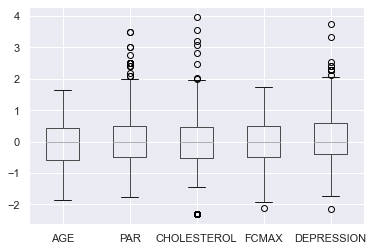

In [170]:
X_train_quanti_normalize.boxplot()

In [171]:
# def trouve_outliers(df):
#     Q1 = np.quantile(df, 0.25)
#     Q3 = np.quantile(df, 0.75)
    
#     EIQ = Q3 - Q1
    
#     Min = Q1 - (EIQ*1.5)
#     Max = Q3 + (EIQ*1.5)
    
#     i = list(df.index[(df < Min) | (df > Max)])
#     val = list(df[i])
    
#     return i, val
    

In [172]:
# trouve_outliers(X_train_normalize["PAR"])

- Utilisons Isolation Forest qui est un algorithme de détection d'anomalies basé sur une arbrescence. 
- Il est basé sur la modélisation des données normales de manière à isoler les anomalies qui sont à la fois peu nombreuses et différentes dans l’espace des entités.

In [173]:
from sklearn.ensemble import IsolationForest

In [174]:
print(X_train_quanti_normalize.shape, X_train_quali.shape, y_train.shape)

(642, 5) (642, 13) (642,)


In [175]:
# Identification des données aberrantes de notre jeu de données

# L'hyperparamètre "contamination" est utilisé pour aider à estimer le nombre de valeurs aberrantes dans l'ensemble de données, 
# il est compris entre 0.0 et 0.5

iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train_quanti_normalize)

In [176]:
## Selection des lignes où il n'existe pas de données aberrantes
mask = yhat != -1

X_train_quanti_normalize, X_train_quali, y_train= X_train_quanti_normalize[mask], X_train_quali[mask], y_train[mask]

In [177]:
print(X_train_quanti_normalize.shape, X_train_quali.shape, y_train.shape)

(577, 5) (577, 13) (577,)


Les valeurs aberrantes étant écartées de notre jeu de données d'entrainement, procédons à la modélisation.

In [178]:
## Reconstitution des Features 
X_train_normalize = pd.concat([X_train_quanti_normalize, X_train_quali], axis=1)

In [180]:
X_train_normalize.head()

,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION,GAJ,SEXE_homme,TDT_AA,TDT_ASY,TDT_AT,TDT_DNA,ECG_LVH,ECG_Normal,ECG_ST,ANGINE_Oui,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat
9,-0.428571,-0.50,0.647520,-0.486486,-0.400000,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
254,0.071429,0.75,0.271540,-1.135135,0.933333,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
787,0.928571,-1.50,0.804178,-0.351351,0.200000,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
82,0.642857,1.00,0.010444,-0.621622,-0.400000,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
64,-0.285714,-1.00,-0.208877,0.189189,-0.400000,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### 3ième Modélisation et évaluation

In [185]:
# Courbe d'apprentissage
plt.figure(figsize=(15,8))
def courbe_apprentissage(model,X_train, y_train):
    N, train_score, val_score = learning_curve(model, X_train, y_train,train_sizes=np.linspace(0.1,1.0,10), cv=5)
    plt.figure(figsize=(15,8))
    plt.plot(N, train_score.mean(axis=1), label='train')
    plt.plot(N, val_score.mean(axis=1), label='validation')
    plt.xlabel('train_size')
    plt.legend()
    plt.show()

<Figure size 1080x576 with 0 Axes>

LogisticRegression(random_state=0, solver='liblinear')
 
Score à l'entrainement : 0.8752166377816292
Score au test : 0.8586956521739131
[[ 96  24]
 [ 15 141]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       120
           1       0.85      0.90      0.88       156

    accuracy                           0.86       276
   macro avg       0.86      0.85      0.85       276
weighted avg       0.86      0.86      0.86       276



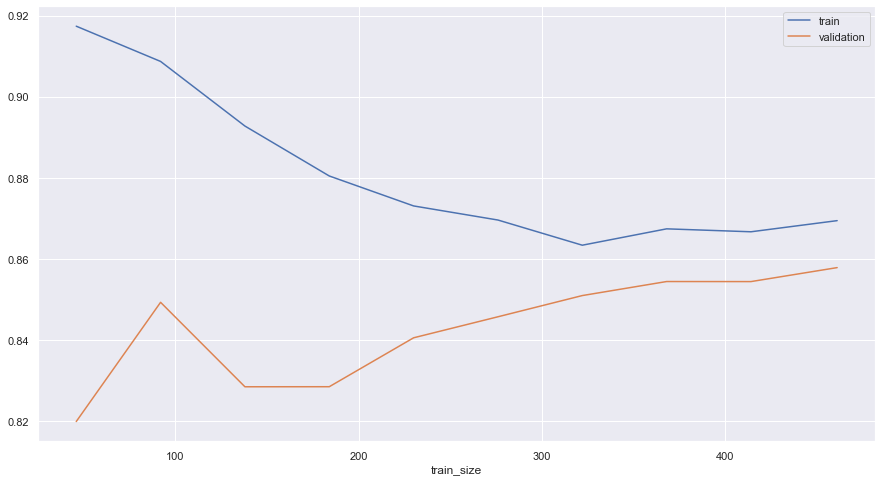

KNeighborsClassifier()
 
Score à l'entrainement : 0.901213171577123
Score au test : 0.8731884057971014
[[ 97  23]
 [ 12 144]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       120
           1       0.86      0.92      0.89       156

    accuracy                           0.87       276
   macro avg       0.88      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



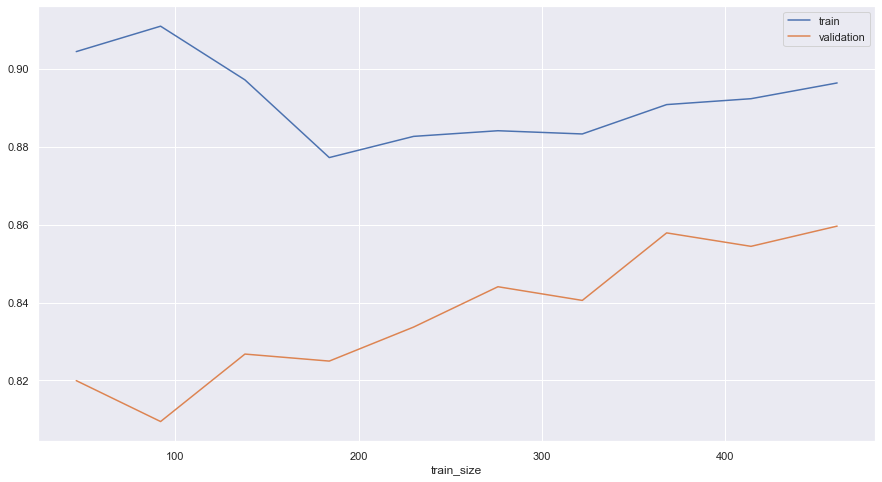

SVC()
 
Score à l'entrainement : 0.9081455805892548
Score au test : 0.8731884057971014
[[ 94  26]
 [  9 147]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       120
           1       0.85      0.94      0.89       156

    accuracy                           0.87       276
   macro avg       0.88      0.86      0.87       276
weighted avg       0.88      0.87      0.87       276



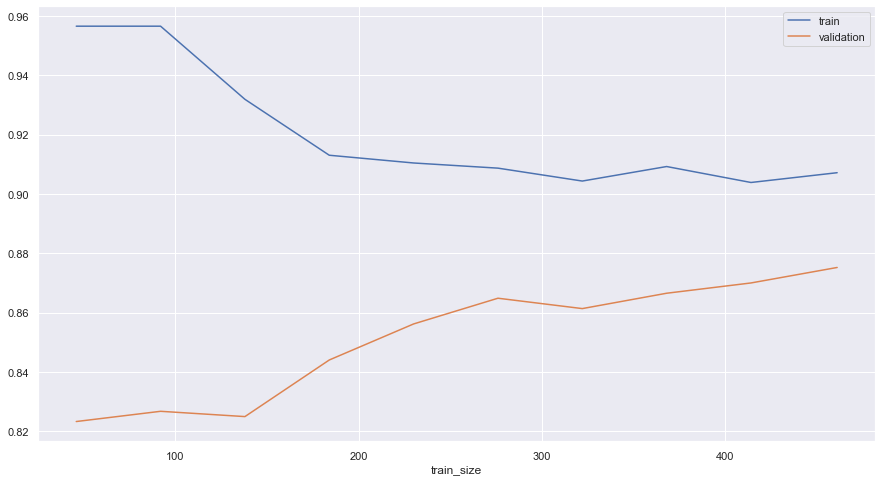

RandomForestClassifier(random_state=0)
 
Score à l'entrainement : 1.0
Score au test : 0.8731884057971014
[[ 97  23]
 [ 12 144]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       120
           1       0.86      0.92      0.89       156

    accuracy                           0.87       276
   macro avg       0.88      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



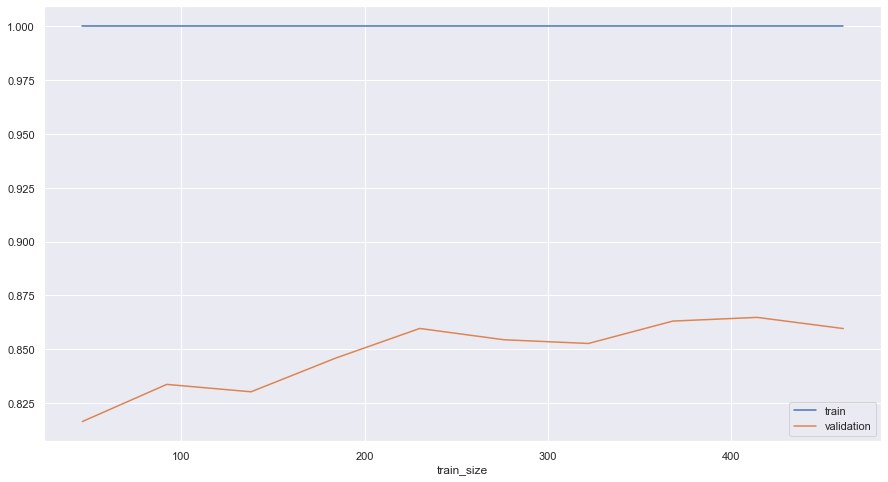

In [186]:
for model in (model_logistic, model_KNN, model_SVC, model_RF):
    evaluation(model, X_train_normalize, y_train, X_test_normalize , y_test)
    courbe_apprentissage(model, X_train_normalize, y_train)
    print(120*'=')

La suppression de valeurs abérrantes ne semblent pas affecter les résultats de la 2ième modélisation.